# Project Name - Online Retail Customer Segmentation

# Project Type - Unsupervised Machine Learning

# Contribution - Individual

# Name - Tushar Raskar

# GitHub Link

https://github.com/tusharraskar/Online-Retail-Customer-Segmentation.git

# Problem Statement

### Business Problem Overview

Online retail businesses face the challenge of understanding their customer base in order to effectively target their marketing efforts and improve customer satisfaction. 

Customer segmentation is a process of dividing customers into groups based on shared characteristics such as demographics, purchasing behavior, and online behavior. 

The goal of online retail customer segmentation is to gain insights into customer needs and preferences, and to develop targeted marketing strategies that address the unique needs and behaviors of each segment. 

This can help increase customer loyalty, improve sales, and drive growth for the business.

### Business Objective

The objective of online retail customer segmentation is to identify and understand different customer segments and their unique needs, behaviors, and preferences. 

This allows the business to tailor their marketing and sales strategies to each segment, increase customer satisfaction, and ultimately increase customer loyalty and revenue. 

The ultimate goal is to provide a personalized experience for each customer, resulting in increased brand loyalty and long-term customer engagement.

### Feature Description 

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Import Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset Loading
data = pd.read_csv('Online Retail.csv')

In [3]:
# Viewing data's first 5 row

data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [4]:
# Chicking shape of data

data.shape

(541909, 8)

#### Data has 541909 rows and 8 columns.

In [5]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# Checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Ckechking null or missing values

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### In our data there is null valuse in
1. Description = 1454
2. CustomerID = 135080

Customer ID is our Identification feature and Description has Product description.

We cannot do Clustering without Customer ID values.

## Checking unique values in each feature

In [8]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## Data Describe

In [9]:
# Creating copy of the current data and assigning to df
df=data.copy()

In [10]:
df.dropna(subset=['CustomerID'],inplace=True) 

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
data.describe() 

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

Text(0.5, 0, 'Quantity')

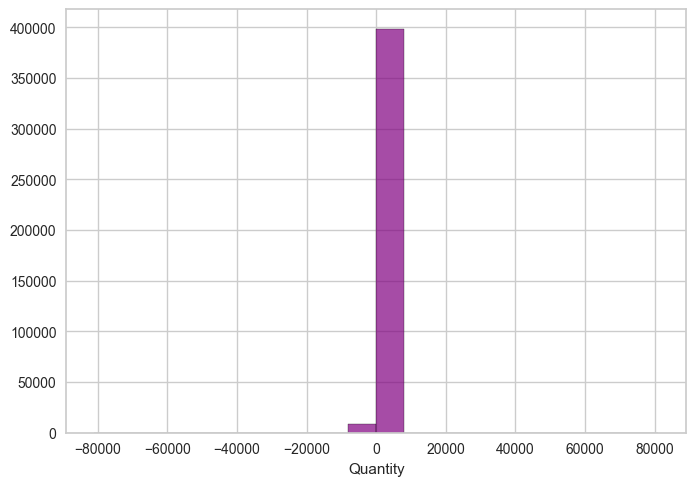

In [13]:
# Checking distrubution of Quantity

plt.hist(df['Quantity'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Quantity')


Customer ID is our Identification feature and Description has Product description.

We cannot do Clustering without Customer ID values.

Hence, droppingg the missing values

In [14]:
# removing data which hnave negetive values
df=df[df['Quantity']>0]

In [15]:
# Checking data types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [16]:
df.shape

(397924, 8)

### Our data got reduced now we have 397924 datapoints

# Feature Engineering

In [17]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 12/1/10 8:26.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format='%m/%d/%y %H:%M')

In [18]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [19]:
# extracting month from the Invoice date
df['Month']=df['InvoiceDate'].dt.month_name()

In [20]:
# Making total amount column by multiplying quantity with price
df['TotalAmount']=df['Quantity']*df['UnitPrice'] 

In [21]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month  TotalAmount  
0        1     8      26  December        15.30  
1        1     8      26  December        20.34  
2        1     8      26  December        22.00  
3        1     8      26  December        20.34  
4        1     8      26  December        20.34

# Exploratory Data Analysis

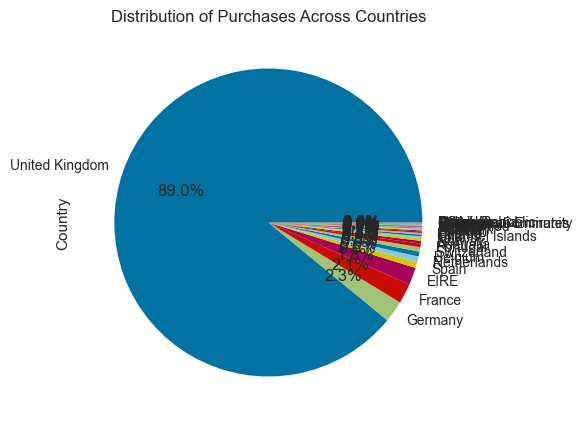

In [22]:
# Plot 6: Pie chart of distribution of purchases across countries
df['Country'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,5))
plt.title('Distribution of Purchases Across Countries')
plt.show()

# Exploring StockCode feature - Univariate and Bivariate analysis

In [23]:
# Checking the number of unique StockCodes
print("Number of unique StockCodes: ", len(data.StockCode.unique()))

Number of unique StockCodes:  4070


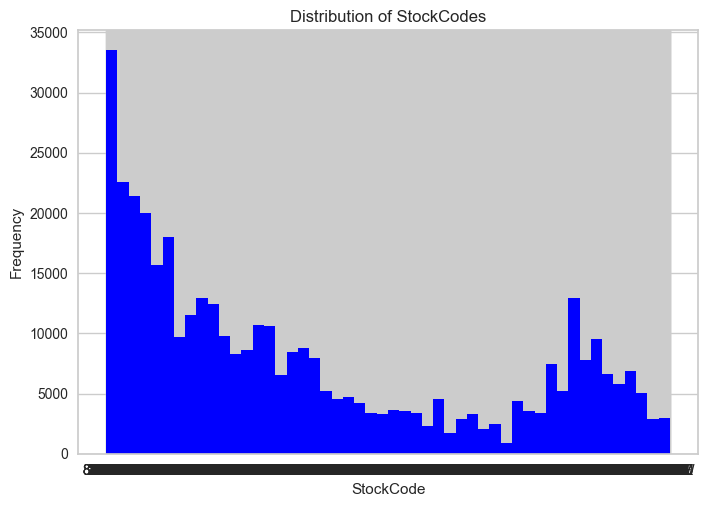

In [24]:
# Plotting the distribution of StockCodes
plt.hist(df.StockCode, bins = 50, color = 'blue')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.title('Distribution of StockCodes')
plt.show()

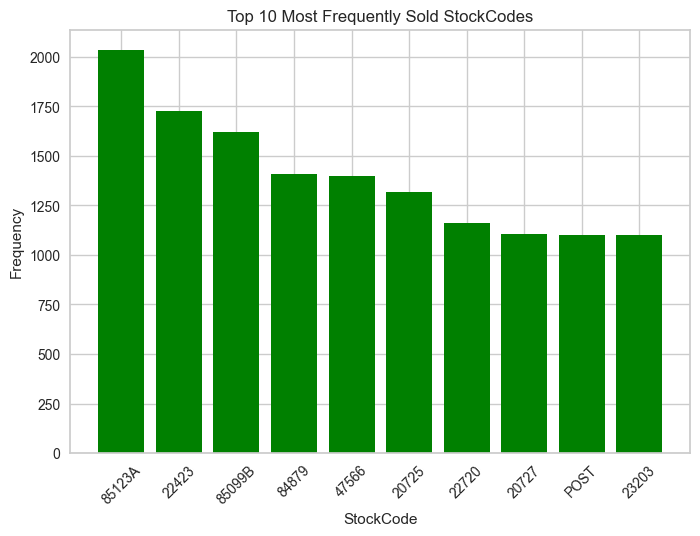

In [25]:
# Plotting the top 10 most frequently sold StockCodes
top_10 = df.StockCode.value_counts().head(10)
plt.bar(top_10.index, top_10.values, color = 'green')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequently Sold StockCodes')
plt.xticks(rotation = 45)
plt.show()

In [26]:
df.StockCode.value_counts().head(10)

85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
20725     1317
22720     1159
20727     1105
POST      1099
23203     1098
Name: StockCode, dtype: int64

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the analysis of the most frequently sold StockCode in the online retail business are:

The most frequently sold product is StockCode 85123A with 2035 sales, followed by StockCode 22423 with 1724 sales.

The top 10 most frequently sold StockCode represents a significant proportion of the overall sales, accounting for more than 10,000 sales in total.

The products with StockCode 85099B, 84879, 47566, and 20725 are also among the top-selling products, indicating a strong demand for these specific items.

The StockCode POST represents a significant number of sales, which could indicate the popularity of postage and delivery services among the customers.

The data also suggests that there is a mix of unique products (represented by different StockCodes) as well as repeat purchases of the same items, indicating customer loyalty and repeat business.

##### 3. Will the gained insights help creating a positive business impact?   

Yes, the gained insights from the analysis of the most frequently sold StockCode can help create a positive business impact. 

The information on the top-selling products can be used by the business to make strategic decisions such as stocking more of the popular items and improving marketing efforts for those specific products. 

By understanding the demands and preferences of customers, the business can better tailor its offerings and improve its overall revenue and profits.

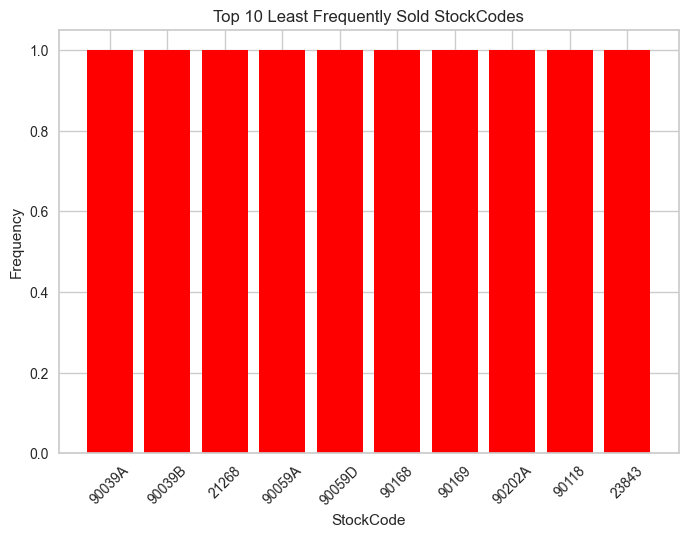

In [27]:
# Plotting the top 10 least frequently sold StockCodes
top_10 = df.StockCode.value_counts().tail(10)
plt.bar(top_10.index, top_10.values, color = 'red')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.title('Top 10 Least Frequently Sold StockCodes')
plt.xticks(rotation = 45)
plt.show()

In [28]:
df.StockCode.value_counts().tail(10)

90039A    1
90039B    1
21268     1
90059A    1
90059D    1
90168     1
90169     1
90202A    1
90118     1
23843     1
Name: StockCode, dtype: int64

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

The top 10 least frequently sold StockCodes are all sold only once. 

This could indicate low demand for these products, which could lead to insights such as the need for marketing efforts to increase demand, or discontinuing the production of these items. 

##### 3. Will the gained insights help creating a positive business impact?   

Yes, The insight that the interested response rate for males is higher (13.84%) than for females (10.39%) could be used to inform the company's marketing efforts.

# Exploring Description feature - Univariate and Bivariate analysis

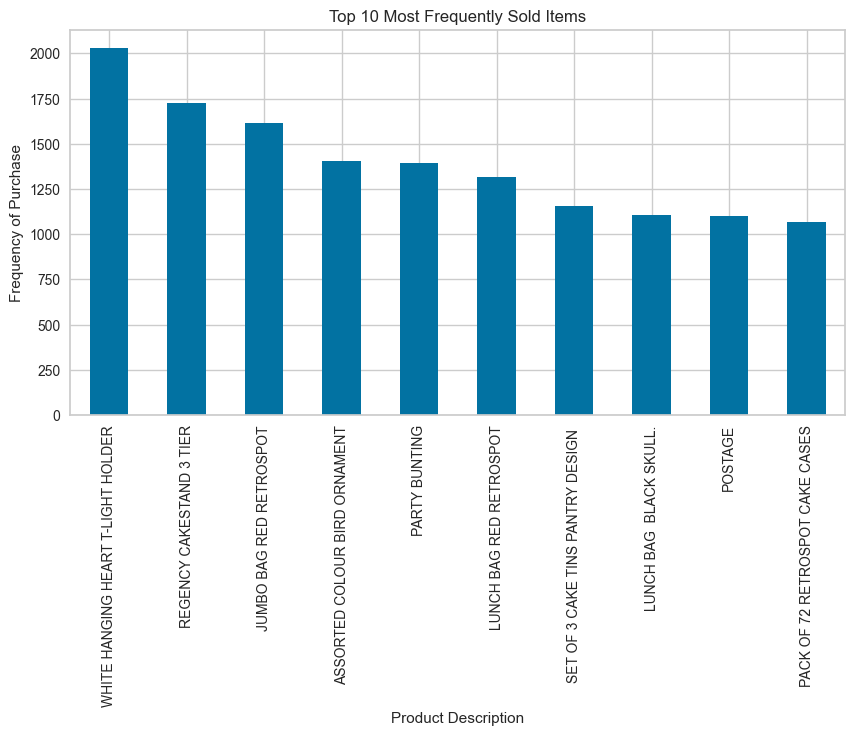

In [29]:
# Bar plot of the top 10 most frequently sold items
df['Description'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.xlabel('Product Description')
plt.ylabel('Frequency of Purchase')
plt.title('Top 10 Most Frequently Sold Items')
plt.show()

In [30]:
df['Description'].value_counts().nlargest(10)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: Description, dtype: int64

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

The majority of the top 10 most frequently sold items are home decor items, such as hanging T-light holders, cake stands, and bird ornaments. This suggests that customers are likely buying these items for their homes.

The items sold are mainly in red or black colors and feature retrospot designs. This suggests that customers are drawn to these colors and designs for home decor items.

There is also a high demand for party-related items, such as bunting and cake tins. This indicates that customers are interested in hosting parties and events.

The high demand for lunch bags suggests that customers are interested in purchasing practical, reusable products for daily use.

There is also a demand for postage services, indicating that customers are purchasing items from this online retail store for delivery to other locations.

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights from the customer segmentation can help create a positive business impact. 

By understanding the top 10 most frequently sold items, the online retail store can focus on promoting and stocking these items to attract more customers who are interested in home decor, party items, and practical, reusable products. This could increase sales and customer satisfaction.

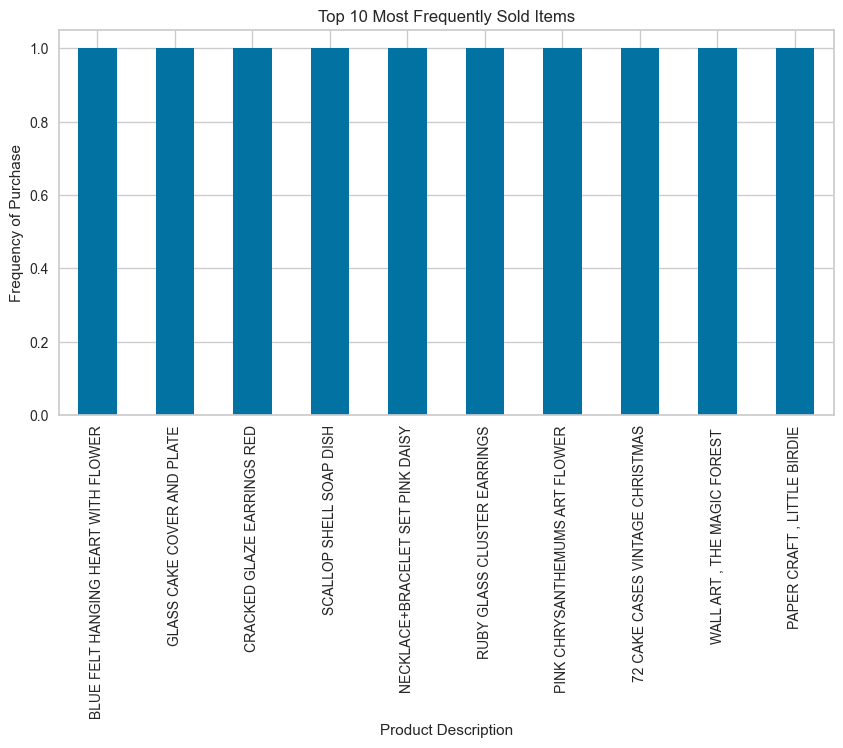

In [31]:
# Bar plot of the top 10 least frequently sold items
df['Description'].value_counts().tail(10).plot(kind='bar', figsize=(10,5))
plt.xlabel('Product Description')
plt.ylabel('Frequency of Purchase')
plt.title('Top 10 Most Frequently Sold Items')
plt.show() 

In [32]:
df['Description'].value_counts().tail(10)

BLUE FELT HANGING HEART WITH FLOWER    1
GLASS CAKE COVER AND PLATE             1
CRACKED GLAZE EARRINGS RED             1
SCALLOP SHELL SOAP DISH                1
NECKLACE+BRACELET SET PINK DAISY       1
RUBY GLASS CLUSTER EARRINGS            1
PINK CHRYSANTHEMUMS ART FLOWER         1
72 CAKE CASES VINTAGE CHRISTMAS        1
WALL ART , THE MAGIC FOREST            1
PAPER CRAFT , LITTLE BIRDIE            1
Name: Description, dtype: int64

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

Based on the data of the top 10 least frequently sold items, it can be concluded that these items are not in high demand among customers. This information can be used by retailers to optimize their inventory and reduce their stock of these items.

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights from the top 10 least frequently sold items can help create a positive business impact for the retailer. By reducing the stock of these items, the retailer can save money on inventory costs, reduce storage space, and optimize their resources to focus on more popular and in-demand items. 

# Exploring Quantity feature -  Bivariate analysis

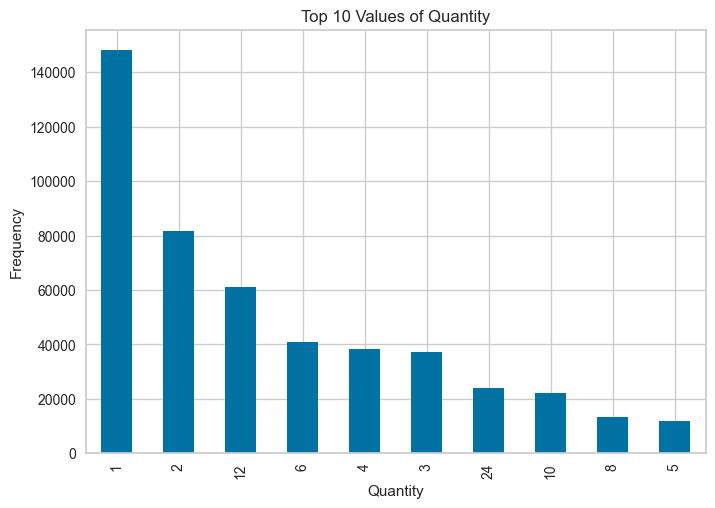

In [33]:
# Plot the top 10 values of the 'Quantity' feature
top_10_quantity = data['Quantity'].value_counts().head(10)
top_10_quantity.plot(kind='bar')
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Top 10 Values of Quantity")
plt.show()

In [34]:
top_10_quantity

1     148227
2      81829
12     61063
6      40868
4      38484
3      37121
24     24021
10     22288
8      13129
5      11757
Name: Quantity, dtype: int64

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

From the top 10 values of the 'Quantity' feature, it can be seen that the majority of the transactions involve small quantities of a single item, with the most frequent quantity being 1. 

The second most frequent quantity is 2, followed by 12 and 6. There is a gradual decrease in frequency as the quantity increases. 

The highest quantity in the top 10 values is 24, which is still relatively low. This indicates that most of the transactions in the dataset involve small quantities of a single item, rather than large quantities of multiple items.

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights from the 'Quantity' feature can help create a positive business impact. By understanding the quantity of products that customers typically purchase, the business can tailor their marketing and sales strategies to better meet the needs of their customers.

# Exploring UnitPrice feature -  Univariate and Bivariate analysis

In [35]:
# Mean and median
print('Mean of UnitPrice',df['UnitPrice'].mean())
print('Median of UnitPrice',df['UnitPrice'].median()) 

Mean of UnitPrice 3.1161744805540756
Median of UnitPrice 1.95


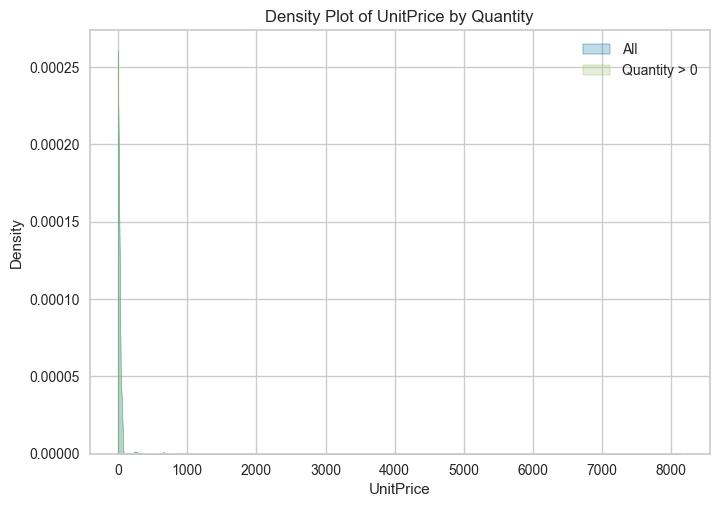

In [36]:
# Plot a density plot of UnitPrice by Quantity
sns.kdeplot(df['UnitPrice'], shade=True)
sns.kdeplot(df[df['Quantity'] > 0]['UnitPrice'], shade=True)
plt.title("Density Plot of UnitPrice by Quantity")
plt.xlabel("UnitPrice")
plt.ylabel("Density")
plt.legend(['All', 'Quantity > 0'])
plt.show()

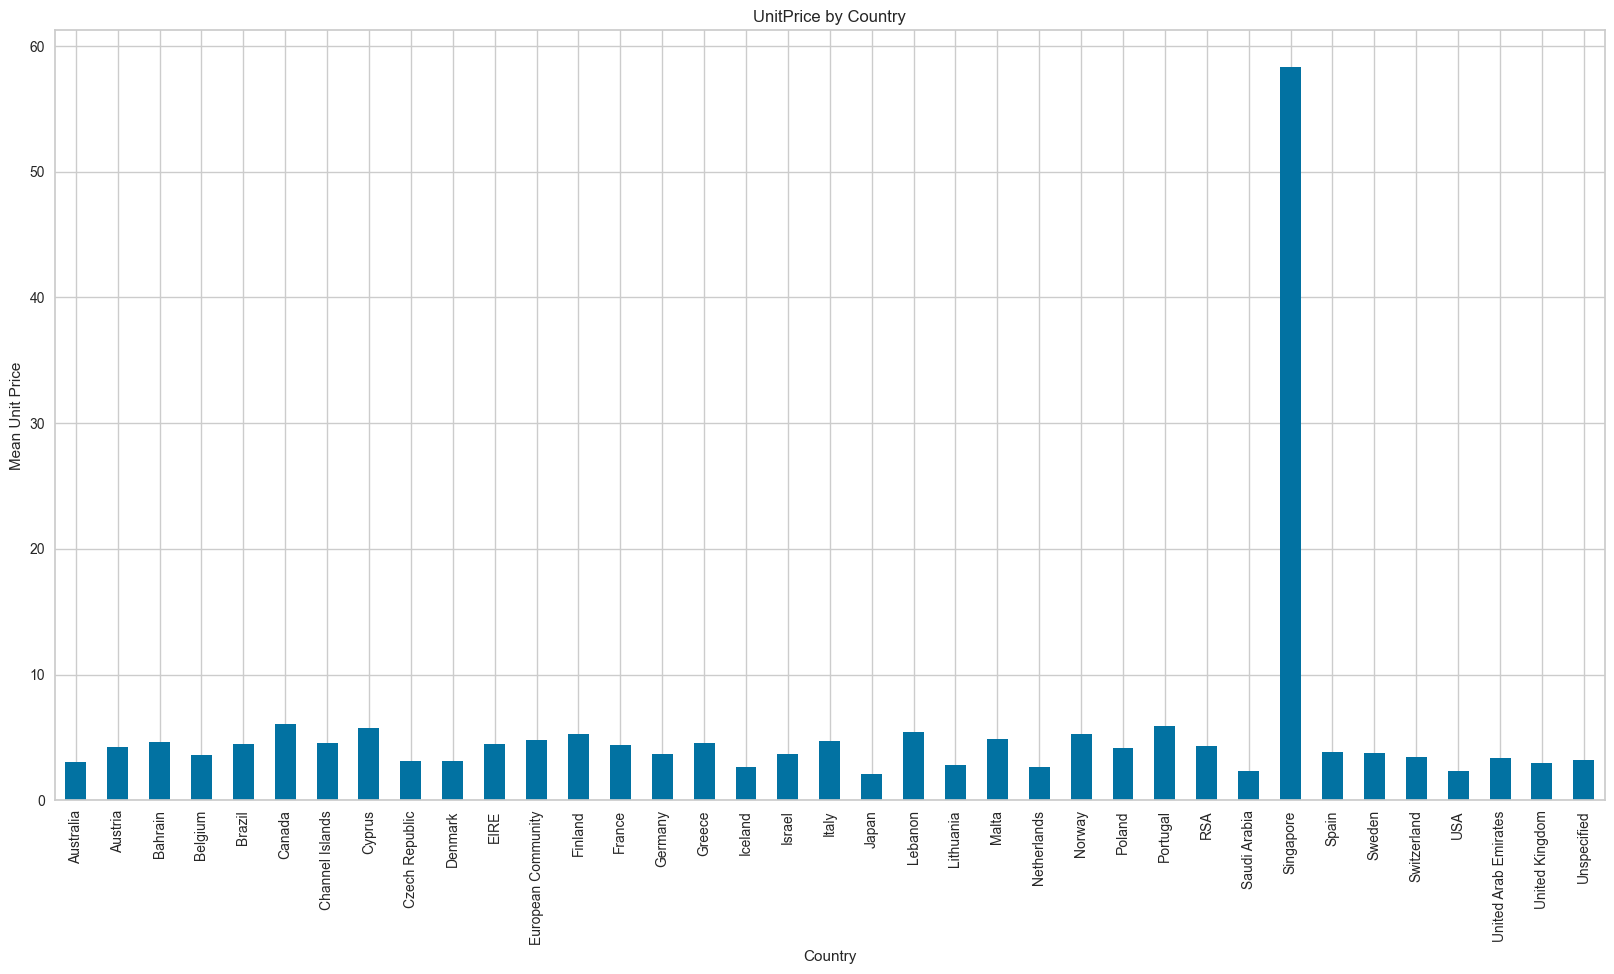

In [37]:
# Group the data by country and calculate the mean of unit price for each country
grouped = df.groupby(['Country'])['UnitPrice'].mean()

# Plot the barplot of UnitPrice by Country
grouped.plot(kind='bar', figsize=(20,10))
plt.xlabel('Country')
plt.ylabel('Mean Unit Price')
plt.title('UnitPrice by Country')
plt.show()

In [38]:
grouped

Country
Australia                3.048523
Austria                  4.256030
Bahrain                  4.644118
Belgium                  3.630158
Brazil                   4.456250
Canada                   6.030331
Channel Islands          4.531618
Cyprus                   5.710391
Czech Republic           3.130800
Denmark                  3.146184
EIRE                     4.445880
European Community       4.830000
Finland                  5.296993
France                   4.415253
Germany                  3.708487
Greece                   4.574414
Iceland                  2.644011
Israel                   3.646935
Italy                    4.717955
Japan                    2.047383
Lebanon                  5.387556
Lithuania                2.841143
Malta                    4.867768
Netherlands              2.643982
Norway                   5.282155
Poland                   4.173364
Portugal                 5.925472
RSA                      4.277586
Saudi Arabia             2.351111
Singap

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

Singapore has the highest average unit price of 58.333288, which indicates that customers in Singapore tend to purchase more expensive products compared to other countries.

USA has an average unit price of 2.308939, which is relatively low compared to other countries.

European countries such as France, Germany, and Belgium tend to have an average unit price between 3.63 to 4.83, which is higher than some countries but lower than others.

Scandinavian countries such as Norway, Sweden, and Denmark also tend to have a relatively high average unit price compared to other countries.

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact by providing a deeper understanding of the purchasing behavior of customers in different countries.

# Exploring CustomerID feature -  Univariate and Bivariate analysis

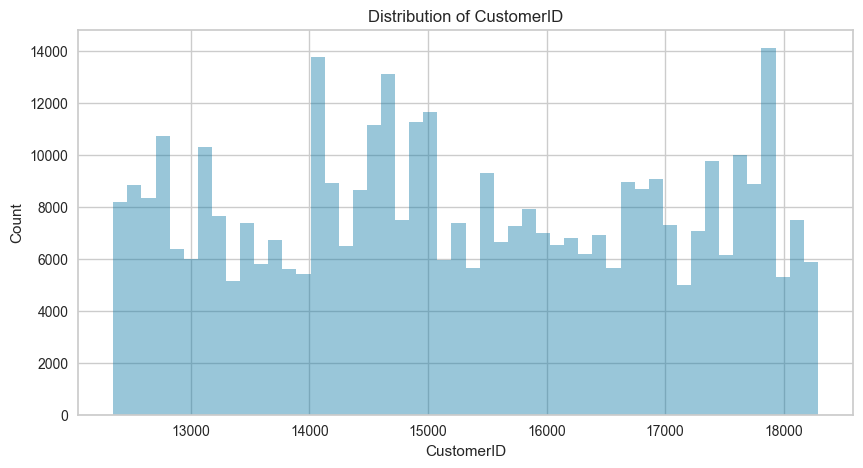

In [39]:
# Plot the distribution of CustomerID
plt.figure(figsize=(10,5))
sns.distplot(df['CustomerID'], kde=False)
plt.title("Distribution of CustomerID")
plt.xlabel("CustomerID")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Top 10 frequent Customers.')

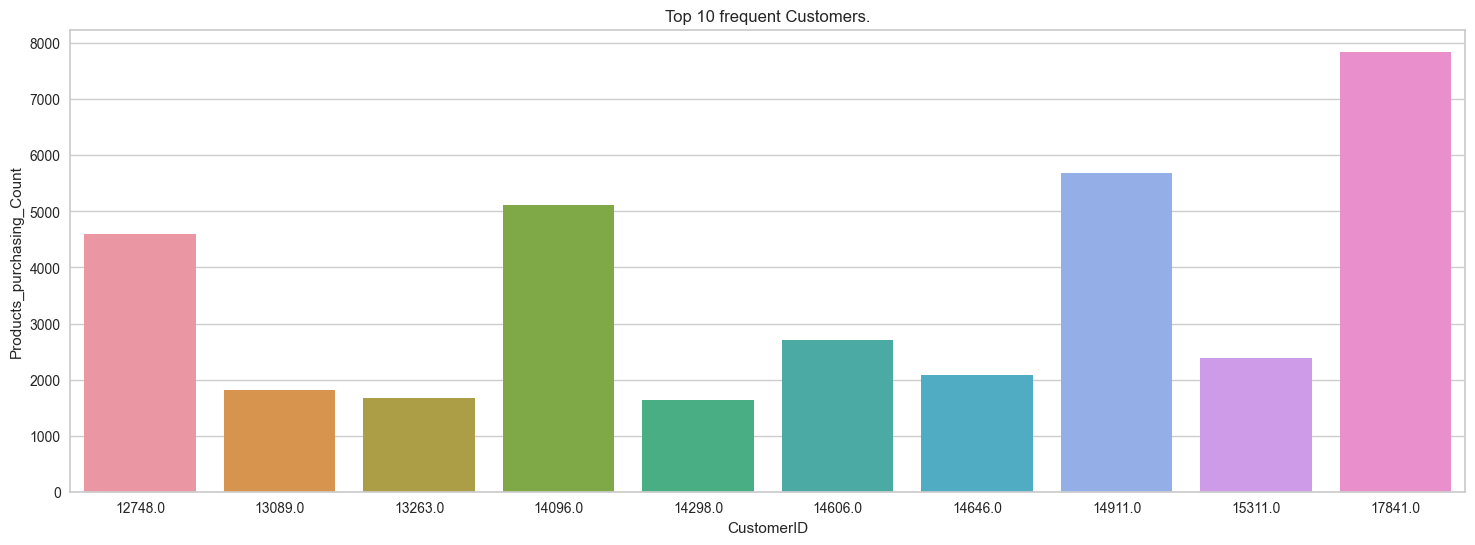

In [40]:
# Top 10 frequent Customers
top_10_customers=df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)

# Top 10 frequent Customers
plt.figure(figsize=(18,6))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

In [41]:
customer_group = df.groupby(by='CustomerID').sum()['Quantity']
top_10 = customer_group.sort_values(ascending=False).head(10)
top_10 

CustomerID
14646.0    197491
16446.0     80997
14911.0     80515
12415.0     77670
12346.0     74215
17450.0     69993
17511.0     64549
18102.0     64124
13694.0     63312
14298.0     58343
Name: Quantity, dtype: int64

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

The insight found from the top 10 frequent customers is that they are the most active customers in terms of purchasing products. 

CustomerID 14646 has the highest purchasing count of 197491, which indicates that they are the most frequent buyer among the top 10 customers. 

This information can help the retail company to understand the customer behavior and target these customers with promotional offers and discounts to increase their loyalty.

3. Will the gained insights help creating a positive business impact?

Yes, the customer segmentation based on purchasing behavior can provide valuable insights for the retail company to improve its marketing strategies, increase customer satisfaction and sales, and ultimately drive its business growth.

# Exploring CustomerID feature -  Univariate and Bivariate analysis

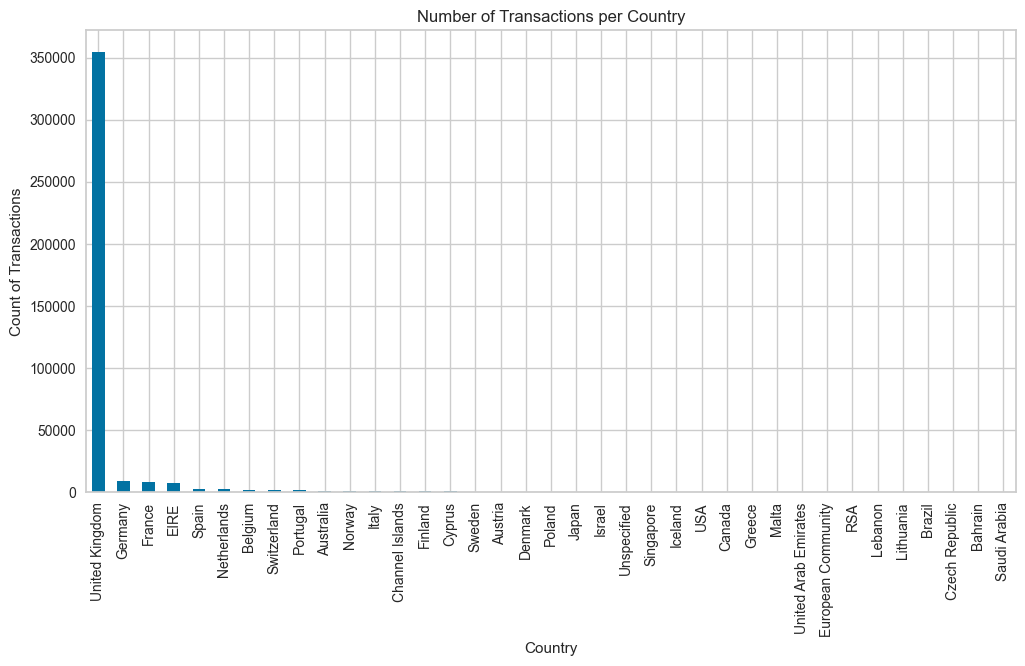

In [42]:
# Bar Plot of the count of transactions per country
plt.figure(figsize=(12, 6))
df['Country'].value_counts().plot(kind='bar')
plt.title('Number of Transactions per Country')
plt.xlabel('Country')
plt.ylabel('Count of Transactions')
plt.show()

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

The majority of the transactions are from the United Kingdom (354345 transactions), while the least number of transactions is from Saudi Arabia (9 transactions).

There are a total of 21 countries represented in the data, with the top five countries accounting for the majority of the transactions.

The data shows a distribution of transactions among countries, which could indicate potential market opportunities for expanding the business in underrepresented countries.

The data could also be used to identify customer preferences and tailor marketing strategies based on the country of residence.

3. Will the gained insights help creating a positive business impact?

Yes, the insights gained from the data on customer transactions and country of residence could potentially have a positive business impact. By understanding the distribution of transactions among different countries, the company can focus their resources on expanding their business in underrepresented countries to tap into new market opportunities.

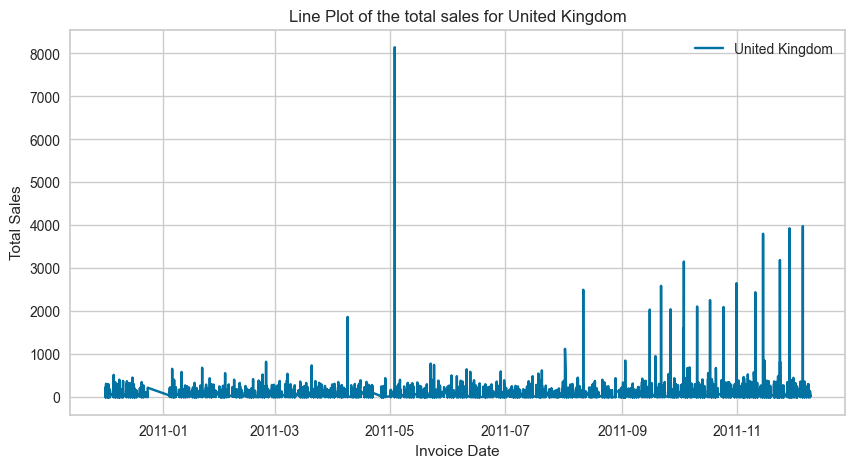

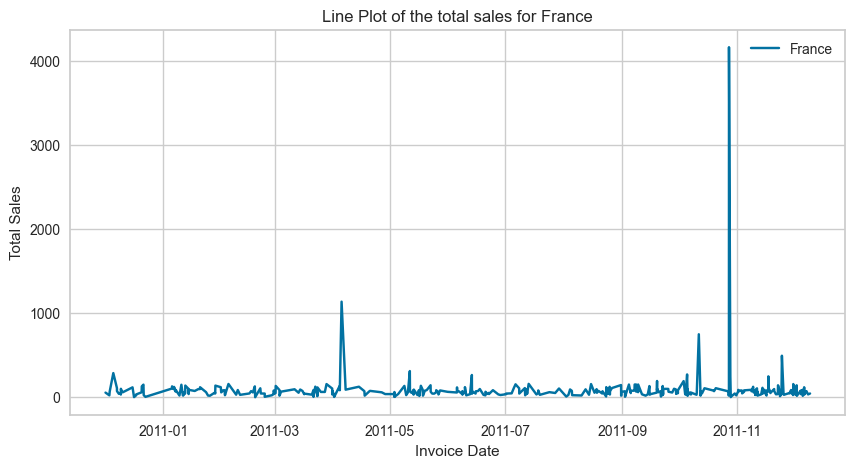

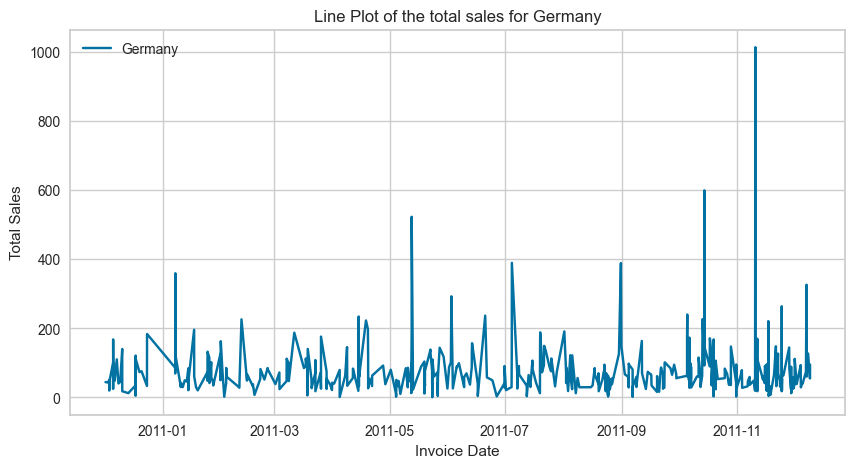

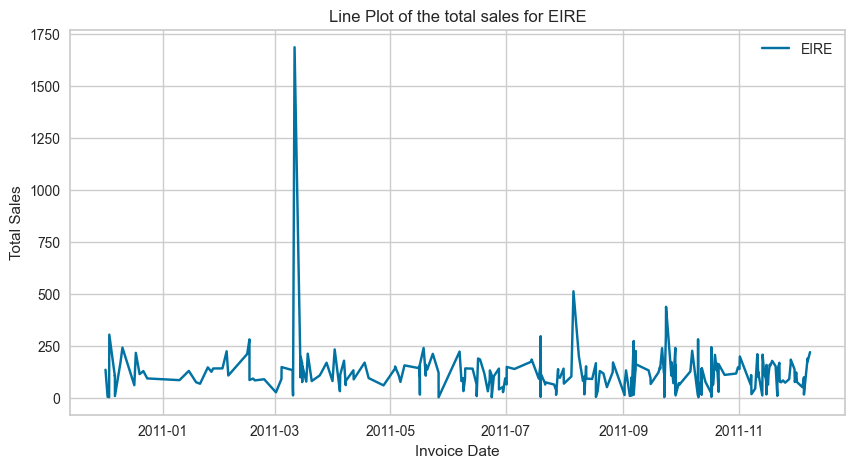

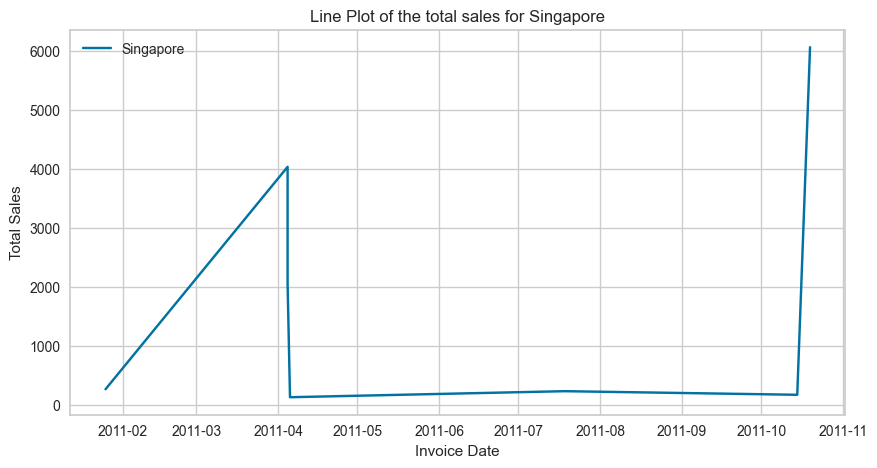

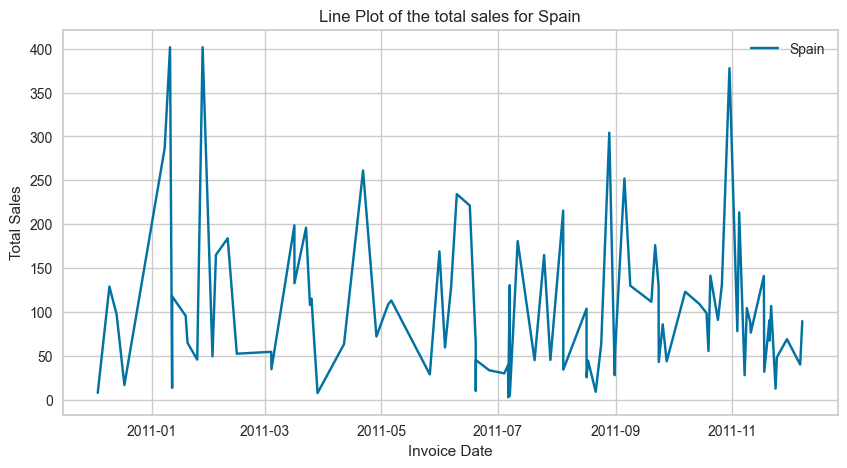

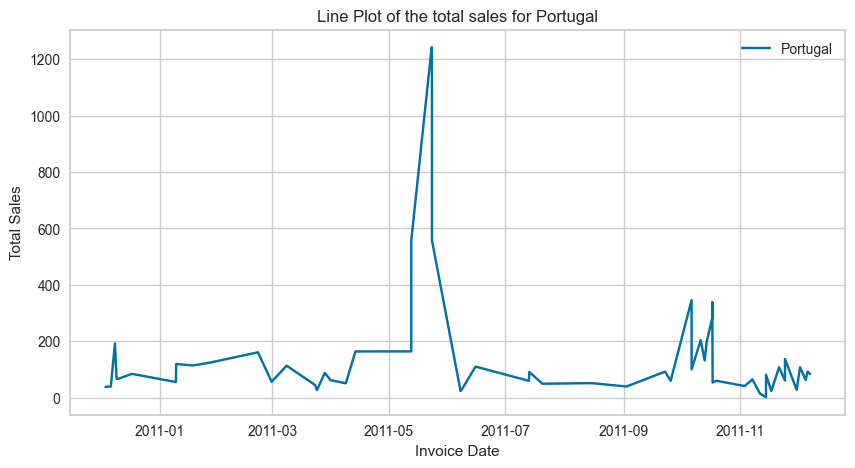

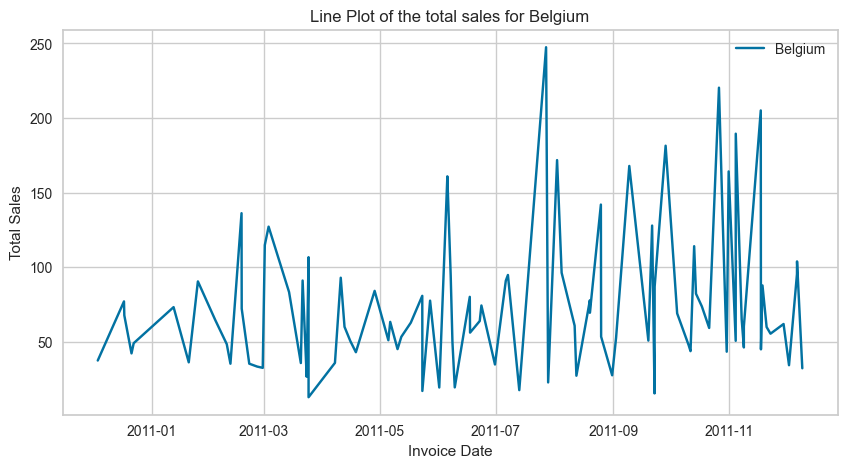

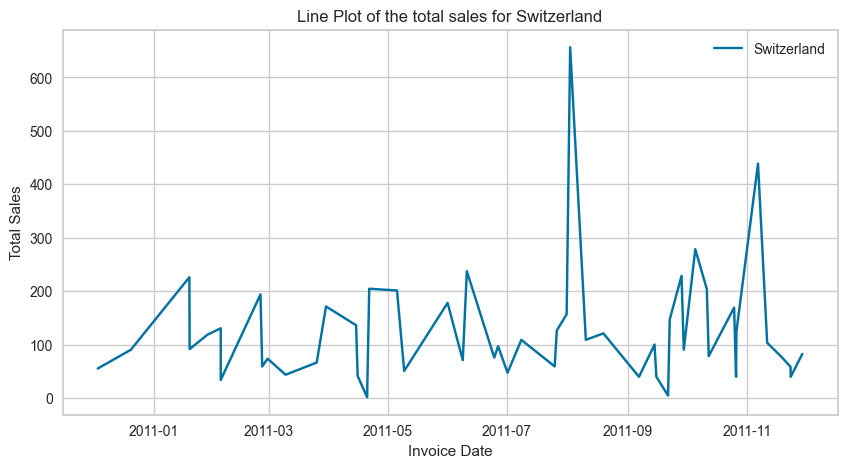

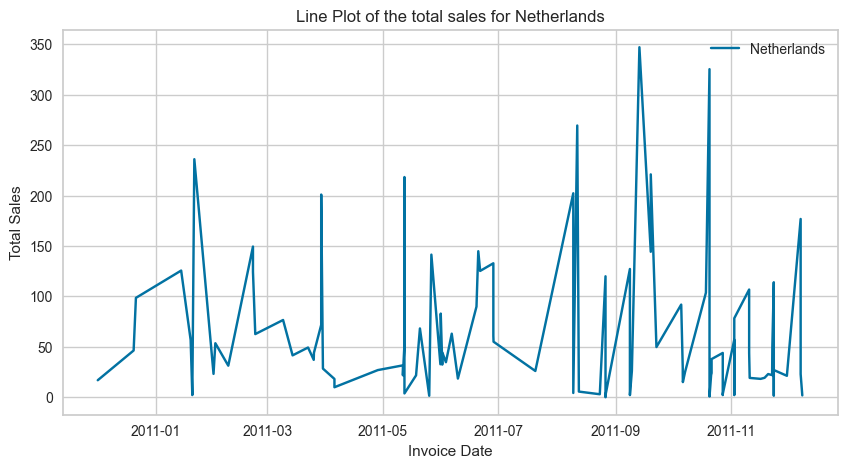

In [43]:
# Aggregate the total sales by country
df_country_sales = df.groupby(["Country"])["UnitPrice"].sum().reset_index()

# Sort by total sales and get the top 10 countries
df_country_sales = df_country_sales.sort_values("UnitPrice", ascending=False).head(10)

# Get a list of the top 10 countries
top_10_countries = df_country_sales["Country"].tolist()

# Create a new dataframe with only the top 10 countries
df_top_10 = df[df["Country"].isin(top_10_countries)]

# Aggregate the sales data by country and date
df_top_10_date_sales = df_top_10.groupby(["Country", "InvoiceDate"])["UnitPrice"].sum().reset_index()

# Convert the InvoiceDate to a datetime object
df_top_10_date_sales["InvoiceDate"] = pd.to_datetime(df_top_10_date_sales["InvoiceDate"])

# Plot a separate plot for each top 10 country
for country in top_10_countries:
    df_country = df_top_10_date_sales[df_top_10_date_sales["Country"] == country]
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df_country["InvoiceDate"], df_country["UnitPrice"], label=country)
    ax.legend()
    ax.set_xlabel("Invoice Date")
    ax.set_ylabel("Total Sales")
    ax.set_title(f"Line Plot of the total sales for {country}")
    plt.show()



Text(0.5, 1.0, 'Top 5 Countries based on highest number of customers')

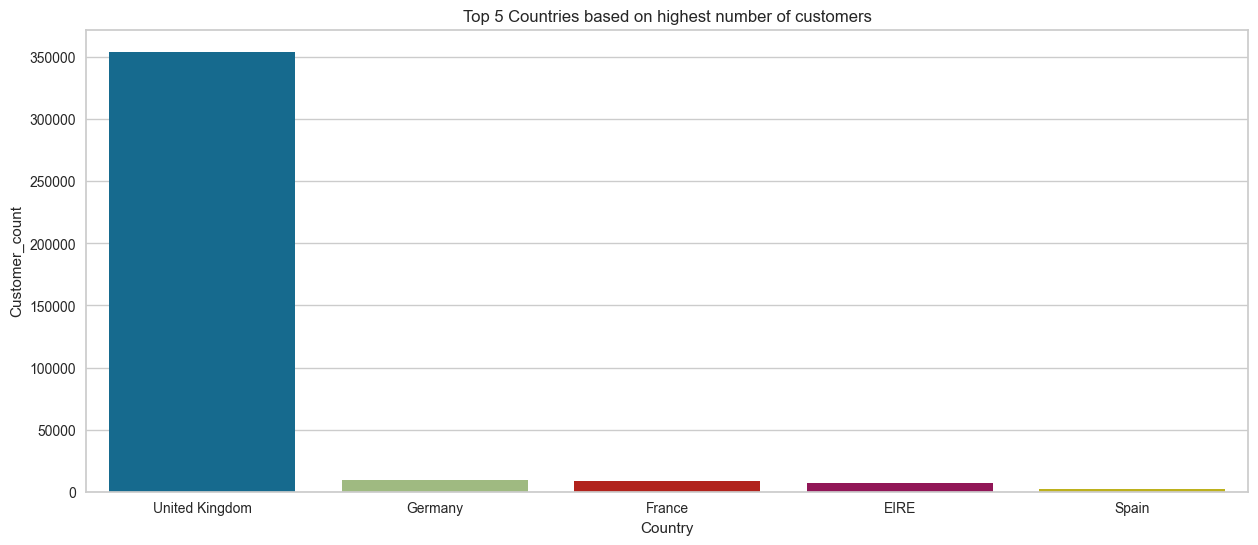

In [44]:
# top 5 countries where max sell happens.
top_5_countries=df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'})
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers') 

In [45]:
top_5_countries[:10]

Country  Customer_count
0  United Kingdom          354345
1         Germany            9042
2          France            8342
3            EIRE            7238
4           Spain            2485
5     Netherlands            2363
6         Belgium            2031
7     Switzerland            1842
8        Portugal            1462
9       Australia            1185

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

United Kingdom has the highest number of customers with 354345, which means that the maximum sales happen in this country.

The top 10 countries that contribute to the maximum sales are United Kingdom, Germany, France, EIRE, Spain, Netherlands, Belgium, Switzerland, Portugal, and Australia.

The rest of the countries have a relatively smaller customer count and contribute to a lesser extent to the overall sales

3. Will the gained insights help creating a positive business impact?

This information can be used by the company to prioritize their marketing efforts in the countries that have a higher customer count and contribute significantly to the sales.

The company can also focus on improving their product offerings in these countries to increase their sales and attract more customers.

Understanding the customer base in different countries can also help the company to make informed decisions about pricing, promotions, and product offerings.

Text(0.5, 1.0, 'Sales count in different Months ')

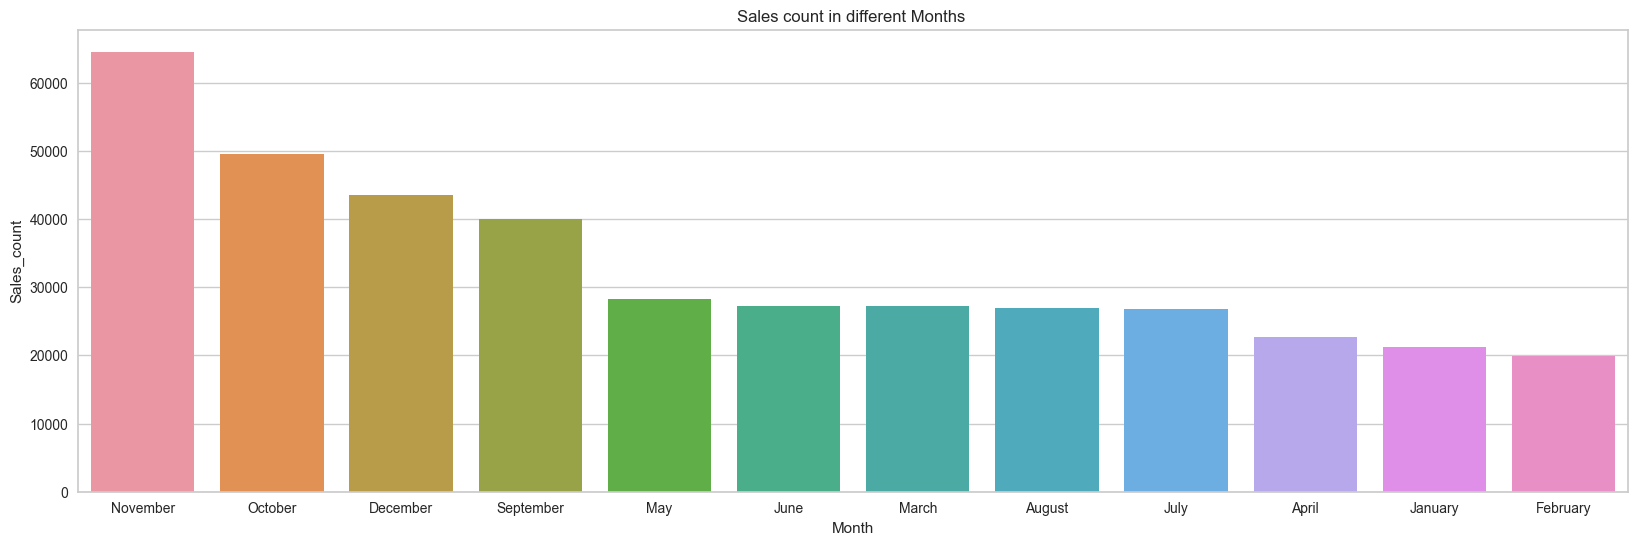

In [46]:
# Sales count in different months.

sales_in_month=df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ') 

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

November is the month with the highest sales count with 64531 transactions.

January has the lowest sales count with 21229 transactions.

There is a fluctuation in the sales count between months, with the highest sales count in November and the lowest in January.

The sales count shows a peak in the months of November and December, which may indicate an increase in holiday season shopping.

The months of May, June, and September also show relatively higher sales counts, indicating a potential increase in sales

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights from the sales count in different months can help create a positive business impact. 

By understanding the trend in sales, the company can make informed decisions on product inventory and promotional strategies during high sales periods. 

Identifying the peak months for sales can help the company allocate resources and staff accordingly to meet customer demand. 

This information can also help the company predict future sales trends and plan accordingly.

In [47]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'TotalAmount'],
      dtype='object')

In [48]:
# Sales count in different days.
day_df=df['day_num'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'day_num': 'Count'}, inplace=True)
day_df

Day_Name  Count
0          6  18349
1          5  16410
2          8  15854
3          7  15604
4         17  14913
5          4  14882
6         20  14668
7         23  14291
8         13  14174
9         14  14166
10        10  14075
11         1  13630
12        28  13510
13        11  13357
14        21  13111
15         9  12947
16        18  12841
17        16  12761
18        27  12433
19        22  12403
20         2  12101
21        24  12086
22        25  12010
23        15  11428
24         3  10878
25        19  10822
26        12  10562
27        30  10035
28        26   8716
29        29   8137
30        31   6770

<AxesSubplot: title={'center': 'Day'}, xlabel='Day_Name', ylabel='Count'>

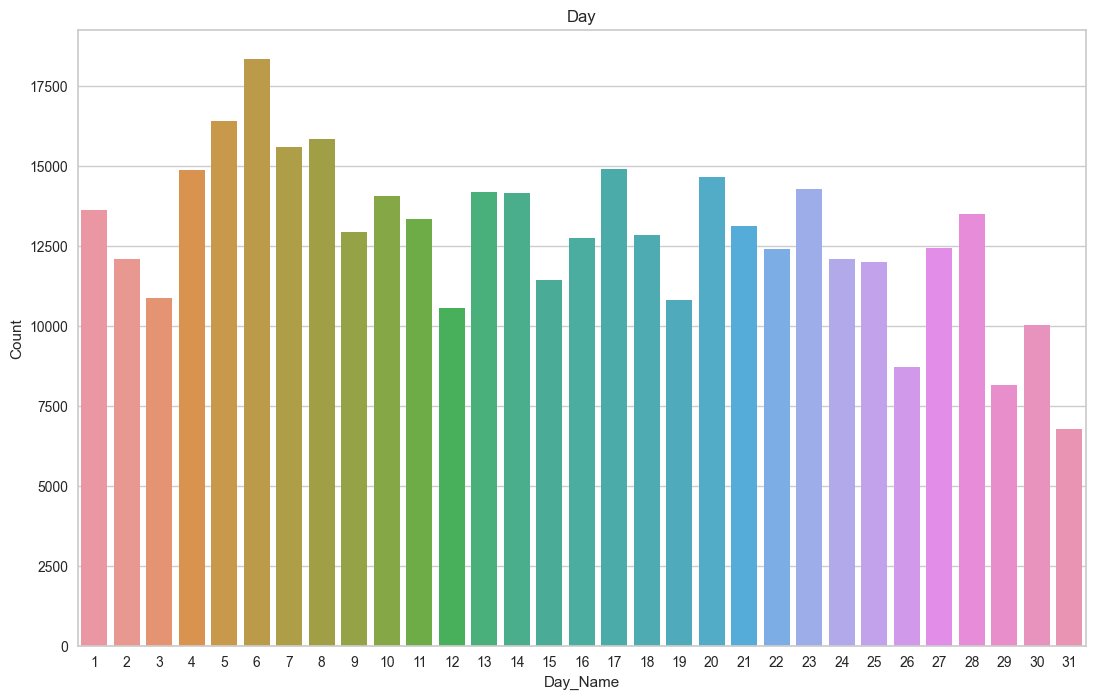

In [49]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

Based on the sales count in different days, the following insights can be found:

Thursday has the highest sales count of 80052, followed by Wednesday with 68888 sales.

The sales count decreases as the days go from Thursday to Sunday, with Sunday having the lowest sales count of 62775.

Monday and Tuesday have similar sales counts with 64899 and 66476 respectively.

Friday has the lowest sales count among the weekdays with 54834 sales.

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact by allowing the company to better understand customer purchasing patterns and make informed decisions on how to allocate resources and promotions. 

In [50]:
# Sales count in different hours.
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  72069
1          13  64031
2          14  54127
3          11  49092
4          15  45372
5          10  37999
6          16  24093
7           9  21945
8          17  13072
9           8   8691
10         19   3322
11         18   2929
12         20    802
13          7    379
14          6      1

<AxesSubplot: title={'center': 'Hour'}, xlabel='Hour_Name', ylabel='Count'>

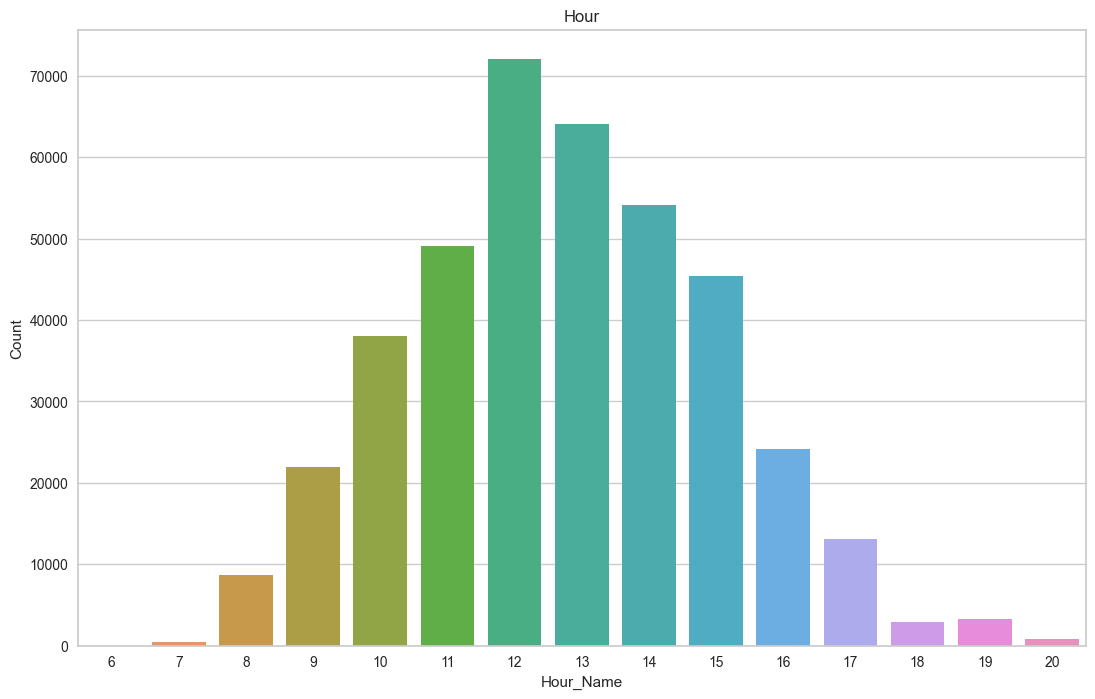

In [51]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

The highest sales count is during the hours of 12 and 13 with 72069 and 64031 counts respectively.

The lowest sales count is during the hours of 6 and 7 with only 1 and 379 counts respectively.

There is a declining trend in sales as the day progresses with a drop in sales count from 12 to 18.

The hours of 8, 9 and 20 have a much lower sales count compared to other hours, which could indicate a slow period for sales during those times.

The data suggests that the peak sales period is between 11am and 2pm, with a drop in sales from 3pm onwards.

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact by allowing retailers to optimize their resources and sales strategies during peak sales hours. 

They can also target customers during off-peak hours by offering special promotions or discounts to increase sales during those times.

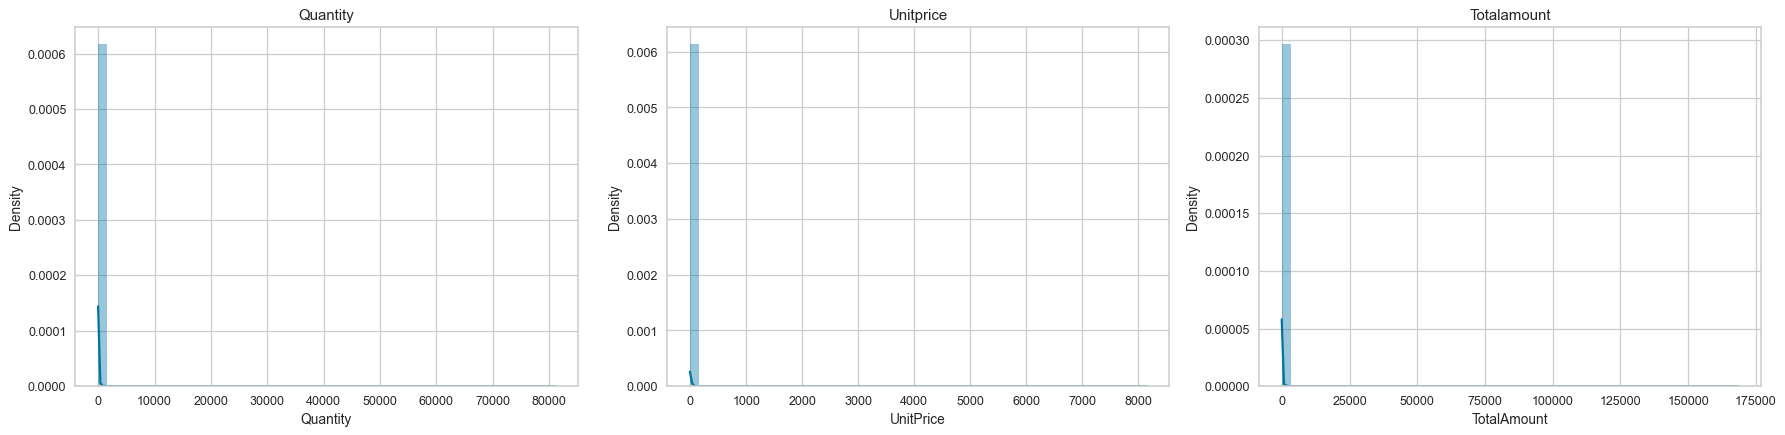

In [52]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(df[col])
  plt.title(col.title())
  plt.tight_layout()

What is/are the insight(s) found from the chart?

It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode
For symmetric graph mean=median=mode.


In [53]:
# Amount wise item purchases
product_price = df.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
product_price.head()

Description  TotalAmount
2319         PAPER CRAFT , LITTLE BIRDIE    168469.60
2767            REGENCY CAKESTAND 3 TIER    142592.95
3698  WHITE HANGING HEART T-LIGHT HOLDER    100448.15
1762             JUMBO BAG RED RETROSPOT     85220.78
1992      MEDIUM CERAMIC TOP STORAGE JAR     81416.73

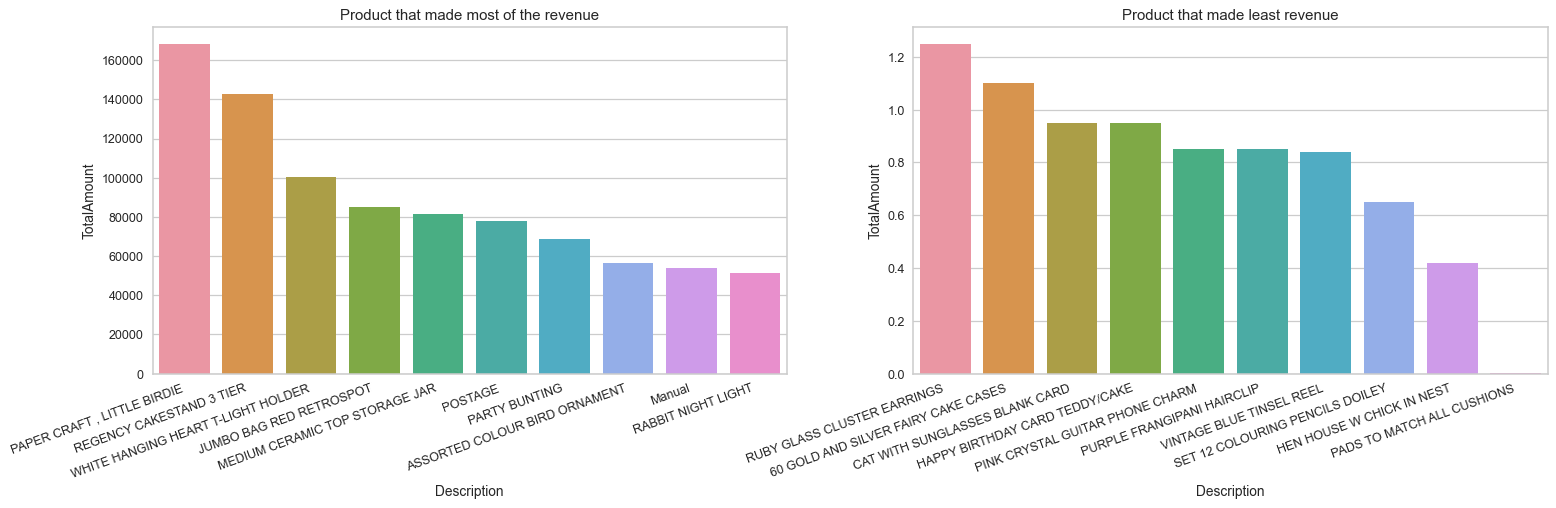

In [54]:
# Visualizing top and bottom 10 products based on amount
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=product_price.head(10),x="Description",y="TotalAmount")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made least revenue")
sns.barplot(data=product_price.tail(10),x="Description",y="TotalAmount")
plt.show()

# Categorical features to numerical using label encoding

In [55]:
# convert categorical features to numerical using label encoding
le = LabelEncoder()
df['InvoiceNo'] = le.fit_transform(df['InvoiceNo'])
df['StockCode'] = le.fit_transform(df['StockCode'])
df['Description'] = le.fit_transform(df['Description'])

# one-hot encoding
df = pd.get_dummies(df, columns=['Country'], prefix='country')

In [56]:
df.head()

InvoiceNo  StockCode  Description  Quantity         InvoiceDate  UnitPrice  \
0          0       3233         3698         6 2010-12-01 08:26:00       2.55   
1          0       2643         3706         6 2010-12-01 08:26:00       3.39   
2          0       2847          858         8 2010-12-01 08:26:00       2.75   
3          0       2795         1804         6 2010-12-01 08:26:00       3.39   
4          0       2794         2763         6 2010-12-01 08:26:00       3.39   

   CustomerID  year  month_num  day_num  ...  country_RSA  \
0     17850.0  2010         12        1  ...            0   
1     17850.0  2010         12        1  ...            0   
2     17850.0  2010         12        1  ...            0   
3     17850.0  2010         12        1  ...            0   
4     17850.0  2010         12        1  ...            0   

   country_Saudi Arabia country_Singapore  country_Spain  country_Sweden  \
0                     0                 0              0               0   
1                     0                 0              0               0   
2                     0                 0              0               0   
3                     0                 0              0               0   
4                     0                 0              0               0   

   country_Switzerland  country_USA  country_United Arab Emirates  \
0                    0            0                             0   
1                    0            0                             0   
2                    0            0                             0   
3                    0            0                             0   
4                    0            0                             0   

   country_United Kingdom  country_Unspecified  
0                       1                    0  
1                       1                    0  
2                       1                    0  
3                       1                    0  
4                       1                    0  

[5 rows x 51 columns]

In [57]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'year', 'month_num', 'day_num', 'hour',
       'minute', 'Month', 'TotalAmount', 'country_Australia',
       'country_Austria', 'country_Bahrain', 'country_Belgium',
       'country_Brazil', 'country_Canada', 'country_Channel Islands',
       'country_Cyprus', 'country_Czech Republic', 'country_Denmark',
       'country_EIRE', 'country_European Community', 'country_Finland',
       'country_France', 'country_Germany', 'country_Greece',
       'country_Iceland', 'country_Israel', 'country_Italy', 'country_Japan',
       'country_Lebanon', 'country_Lithuania', 'country_Malta',
       'country_Netherlands', 'country_Norway', 'country_Poland',
       'country_Portugal', 'country_RSA', 'country_Saudi Arabia',
       'country_Singapore', 'country_Spain', 'country_Sweden',
       'country_Switzerland', 'country_USA', 'country_United Arab Emirates',
       'country_United Kingdom', 'cou

# PCA

In [58]:
X = df.drop(['InvoiceNo', 'InvoiceDate', 'CustomerID','Quantity','UnitPrice','Month'], axis=1)

# Create PCA model and fit the data to it

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

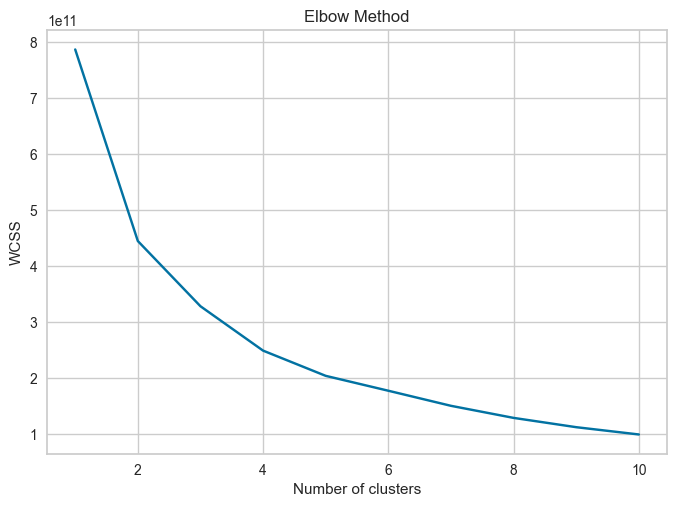

In [59]:
# Build the KMeans model
kmeans = KMeans(random_state=0)

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## RFM Modelling

1. Since Most of the Customers are wholesalers we cannot group customers based on the demographic group like age, gender, income and behavioral and psycho-graphic group Because Our Customers purchase bunch of goods from us and sell it to individual customers.

2. We only need to deal issues and make clusters related to B2B Business to Business instead of B2C i.e. Direct from Business to Customers WHY BECAUSE PEOPLE WHO PURCHASE PRODUCTS FROM US DO NOT UTILIZE IT They sell it to individual customers(B2C) or sell all products to another stores (B2B)

3. Due to all these reasons we need to cluster customers according to there activities i.e
  1. R- Recency 
  2. F- Frequency 
  3. M- Monetary 

## What is RFM?

RFM is a method used to analyze customer value. RFM stands for RECENCY, Frequency, and Monetary.

RECENCY: How recently did the customer visit our website or how recently did a customer purchase?

Frequency: How often do they visit or how often do they purchase?

Monetary: How much revenue we get from their visit or how much do they spend when they purchase?

## Why it is Needed?

RM Analysis is a marketing framework that is used to understand and analyze customer behavior based on the above three factors RECENCY, Frequency, and Monetary.

The RFM Analysis will help the businesses to segment their customer base into different homogenous aroups so that they can engage with each arous with different targeted marketing stratedies.

Recency = Laste Date - Last Invoice Date

Frequency = Count of invoice no. of transactions

Monetary = sum of total amount of each customer

In [60]:
# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = df["InvoiceDate"].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LatestDate - x.max()).days,
                                    'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Renaming the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Checking top 5 rows
rfm.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       19         73   1757.55
4     12350.0      310         17    334.40

In [61]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

In [62]:
# Descriptive Stats= Recency
rfm.Recency.describe()

count    4339.000000
mean       92.518322
std       100.009747
min         1.000000
25%        18.000000
50%        51.000000
75%       142.000000
max       374.000000
Name: Recency, dtype: float64

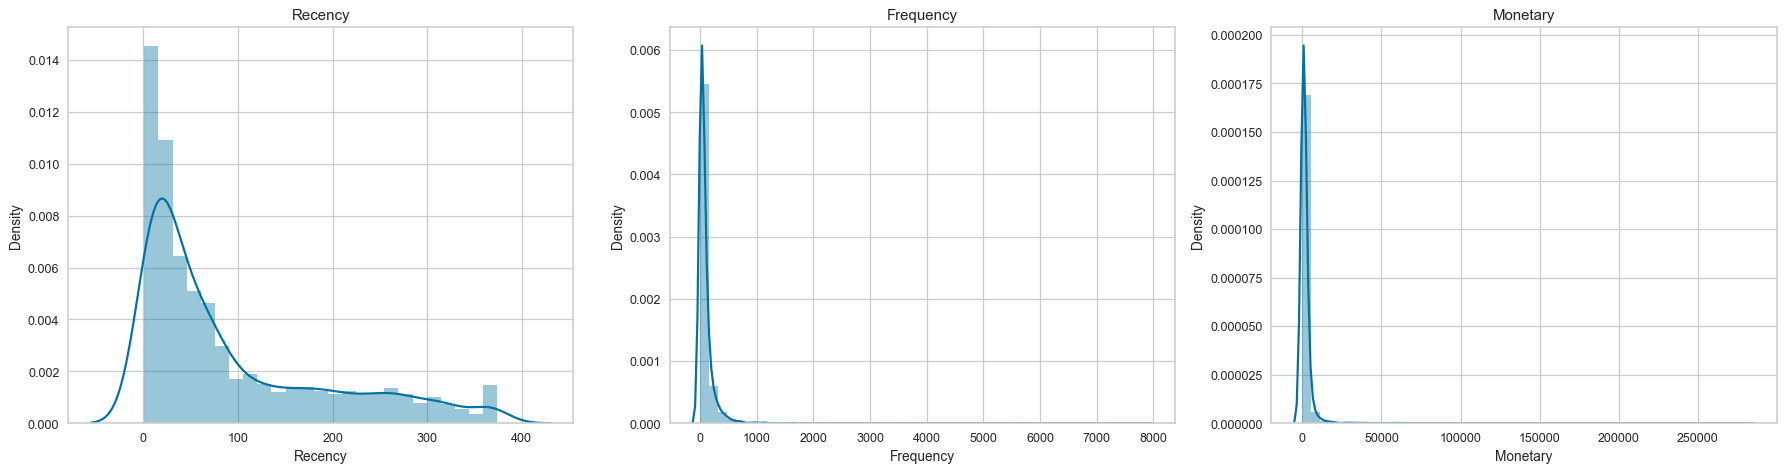

In [63]:
# Visualizing the distributions 
target = ['Recency', 'Frequency','Monetary']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

##### 2. What is/are the insight(s) found from the chart?

The distributions of Recency, Frequency and Monetary columns were positively skewed

In [64]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()

Recency  Frequency  Monetary  R  F  M  RFM  RFM_Score  \
CustomerID                                                          
12346.0         326          1  77183.60  1  1  4  114          6   
12347.0           2        182   4310.00  4  4  4  444         12   
12348.0          75         31   1797.24  2  2  4  224          8   
12349.0          19         73   1757.55  3  3  4  334         10   
12350.0         310         17    334.40  1  1  2  112          4   

            Recency_Log  Frequency_Log  Monetary_Log  
CustomerID                                            
12346.0        5.786897       0.000000     11.253942  
12347.0        0.693147       5.204007      8.368693  
12348.0        4.317488       3.433987      7.494007  
12349.0        2.944439       4.290459      7.471676  
12350.0        5.736572       2.833213      5.812338

In [65]:
# Checking Descriptive Stats
rfm.describe()

Recency    Frequency       Monetary            R            F  \
count  4339.000000  4339.000000    4339.000000  4339.000000  4339.000000   
mean     92.518322    91.708689    2053.793248     2.514174     2.490897   
std     100.009747   228.792852    8988.248329     1.126392     1.122139   
min       1.000000     1.000000       1.000000     1.000000     1.000000   
25%      18.000000    17.000000     307.245000     2.000000     1.000000   
50%      51.000000    41.000000     674.450000     3.000000     2.000000   
75%     142.000000   100.000000    1661.640000     4.000000     3.000000   
max     374.000000  7847.000000  280206.020000     4.000000     4.000000   

                 M          RFM    RFM_Score  Recency_Log  Frequency_Log  \
count  4339.000000  4339.000000  4339.000000  4339.000000    4339.000000   
mean      2.499885   278.826227     7.504955     3.767274       3.679094   
std       1.118266   118.820043     2.816529     1.432382       1.326943   
min       1.000000   111.000000     3.000000     0.000000       0.000000   
25%       1.500000   211.000000     5.000000     2.890372       2.833213   
50%       2.000000   311.000000     7.000000     3.931826       3.713572   
75%       3.500000   411.000000    10.000000     4.955827       4.605170   
max       4.000000   444.000000    12.000000     5.924256       8.967887   

       Monetary_Log  
count   4339.000000  
mean       6.589264  
std        1.264714  
min        0.000000  
25%        5.727645  
50%        6.513898  
75%        7.415560  
max       12.543280

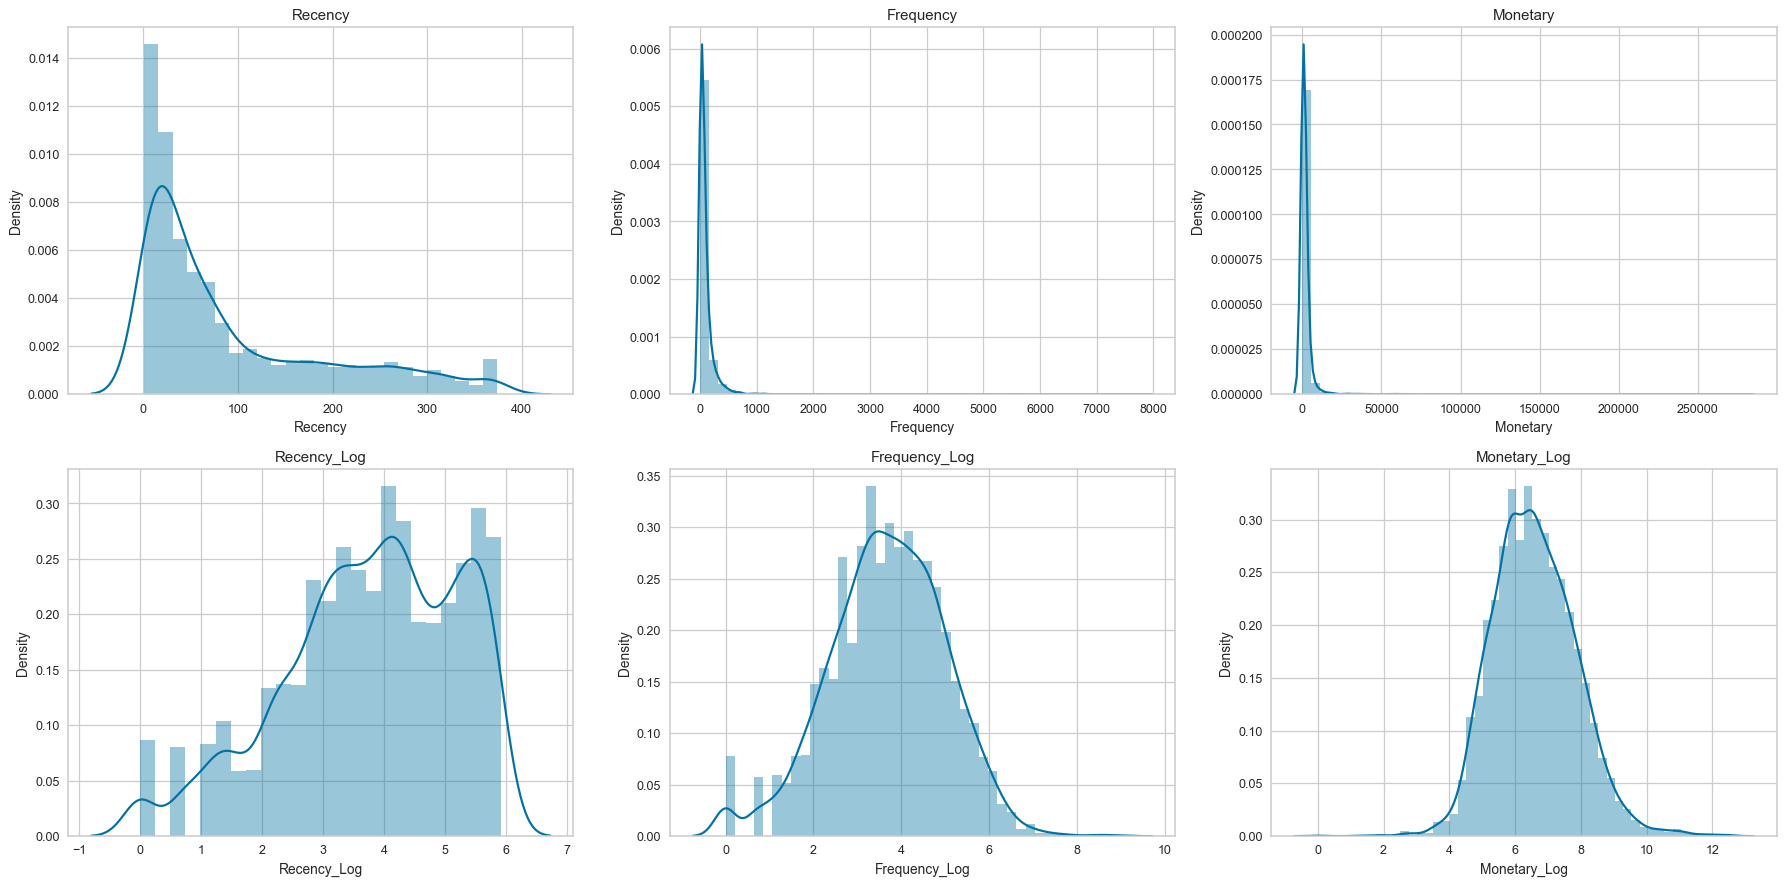

In [66]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency','Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

##### 2. What is/are the insight(s) found from the chart?

Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation, the distributions appear to be symmetrical and normally distributed.

It will be more suitable to use the transformed features for better visualisation of clusters.

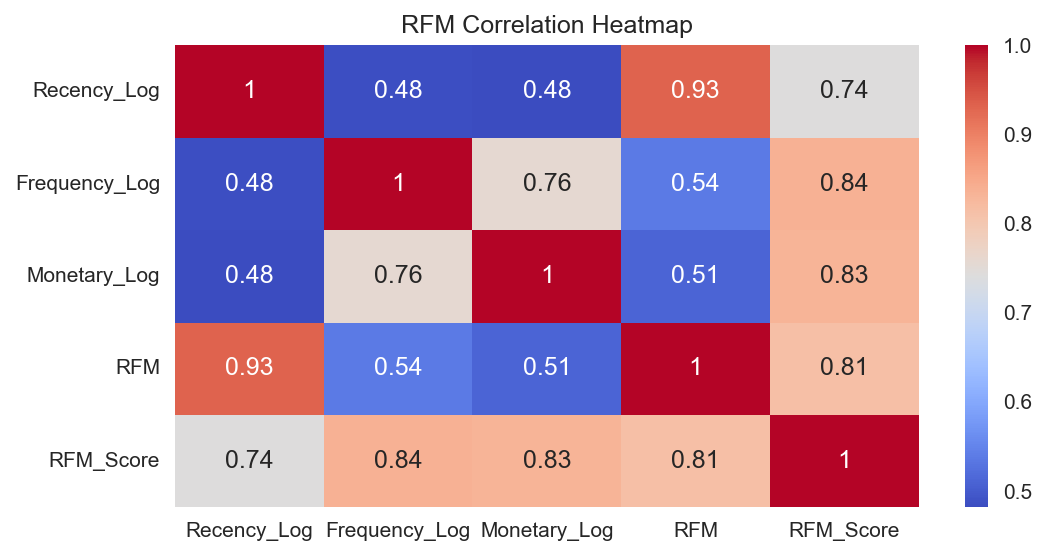

In [67]:
# Visualizing the correlations among features.
target = ['Recency_Log','Frequency_Log','Monetary_Log','RFM','RFM_Score']
plt.figure(figsize = (8, 4), dpi=150)
sns.heatmap(abs(rfm[target].corr()), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

# KMeans Clustering

## KMeans Clustering - Recency_log, Frequency_log and Monetory_log

In [68]:
# taking Recency_log, Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_Log','Frequency_Log','Monetary_Log']
X=rfm[Recency_and_Monetary_feat].values

In [69]:
# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

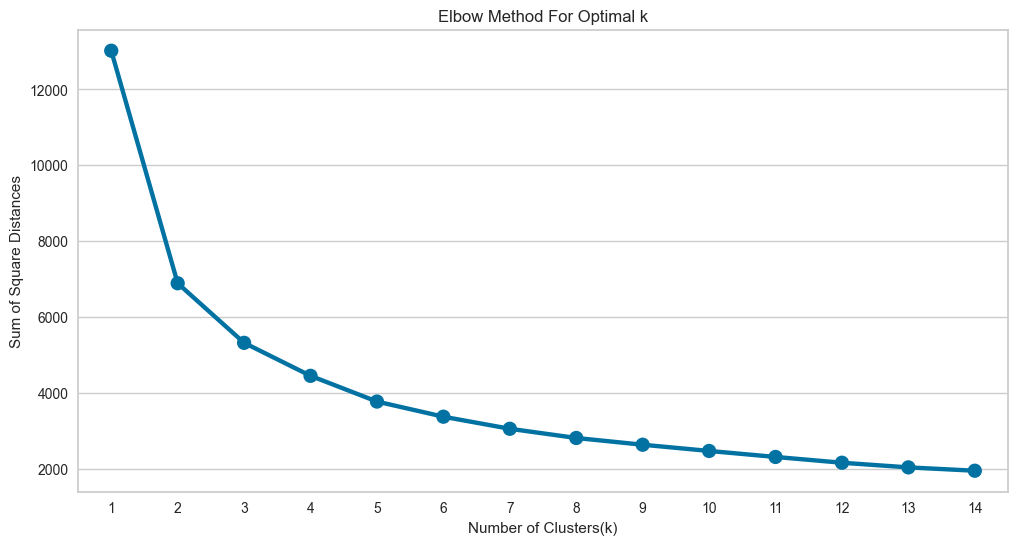

In [70]:
#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Optimal value for cluster is  2.

For n_clusters = 2, silhouette score is 0.39494890662594034


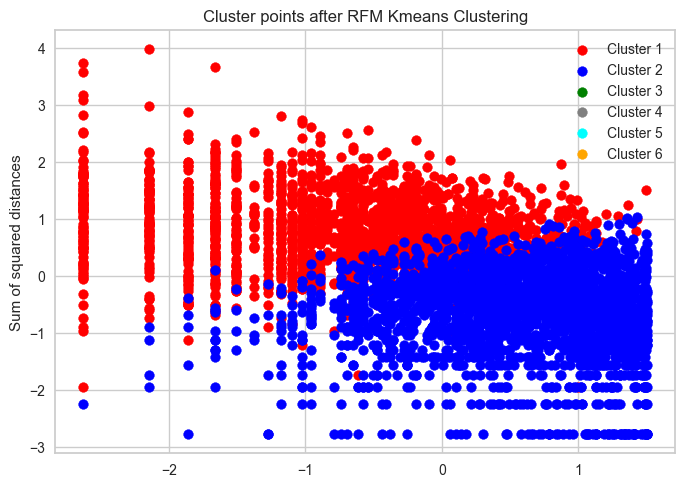

For n_clusters = 3, silhouette score is 0.3028018814679136


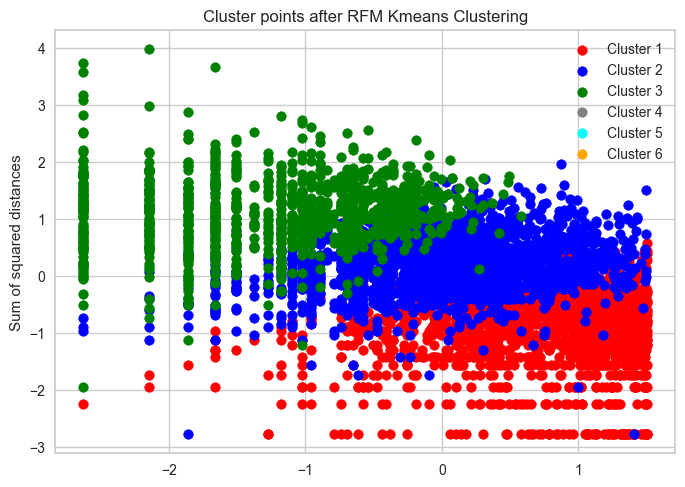

For n_clusters = 4, silhouette score is 0.3009850480997459


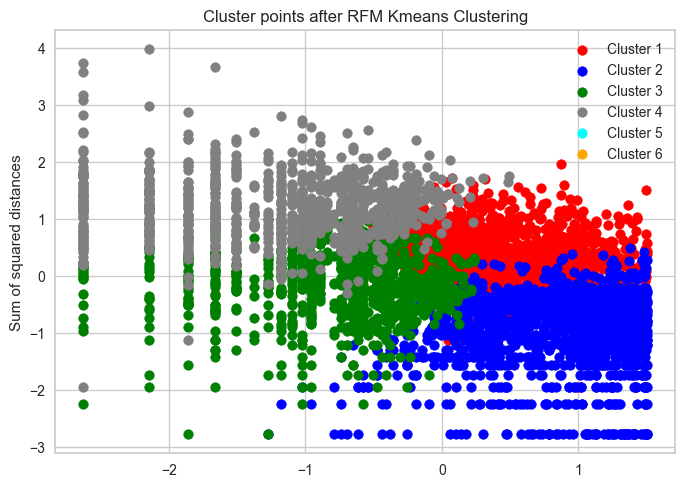

For n_clusters = 5, silhouette score is 0.27808629457361894


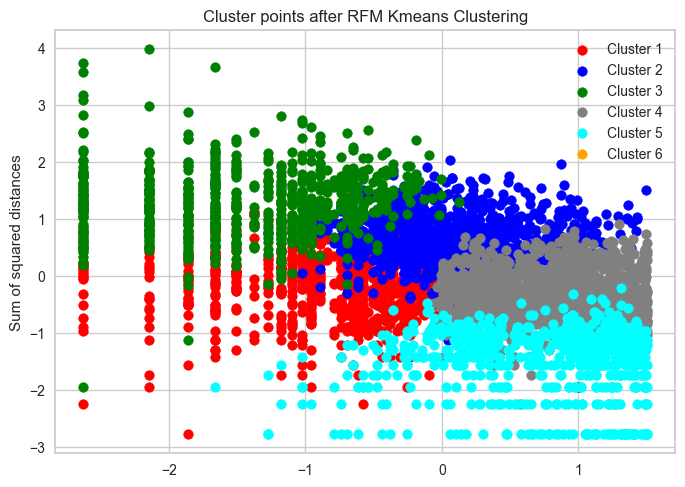

For n_clusters = 6, silhouette score is 0.2761317594080906


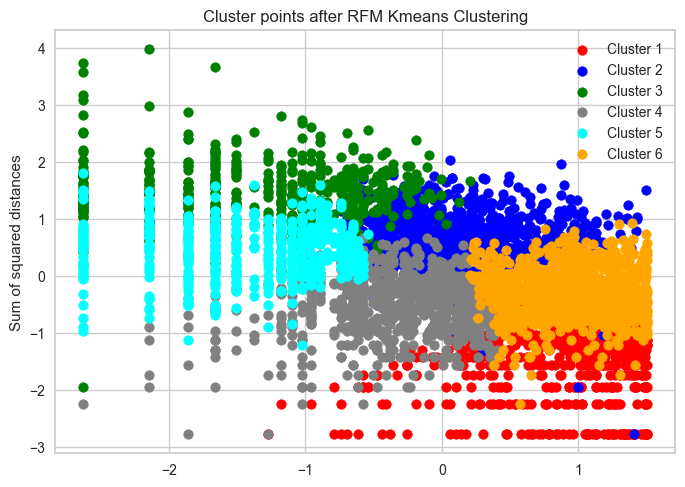

In [71]:
#Silhouette Score Ploting the cluster points
range_n_clusters = [2,3,4,5,6]

for clusters in range_n_clusters:
    # perform Kmeans clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters = clusters, init='k-means++')
    kmeans.fit(X)
    pred = kmeans.predict(X)
    
    score = silhouette_score(X, pred)
    print("For n_clusters = {}, silhouette score is {}".format(clusters, score))

    # plot the cluster points
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c='red', label='Cluster 1')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c='blue', label='Cluster 2')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c='green', label='Cluster 3')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c='gray', label='Cluster 4')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c='cyan', label='Cluster 5')
    plt.scatter(X[pred == 5, 0], X[pred == 5, 1], c='orange', label='Cluster 6')
    plt.title('Cluster points after RFM Kmeans Clustering')

    plt.ylabel('Sum of squared distances')
    plt.legend()
    plt.show()

#### for n_cluster=2 silhouette score is good as compared to others.

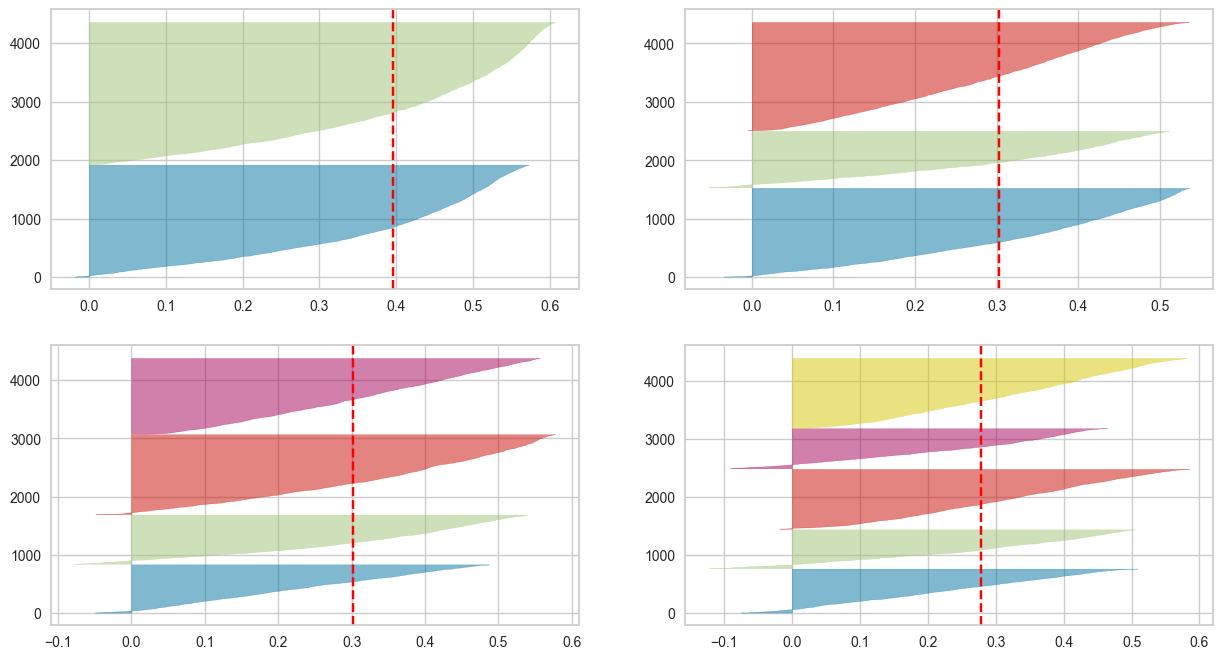

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

#    Create KMeans instance for different number of clusters

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

#    Create SilhouetteVisualizer instance with KMeans instance
#   Fit the visualizer

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 
    

### KMeans Clustering with Recency_log, Frequency_log and Monetory_log

Based on the silhouette scores, it looks like the best number of clusters is 2. 

A higher silhouette score indicates that the data points in a cluster are similar and distinct from data points in other clusters. 

The highest silhouette score is achieved with 2 clusters, but 3 clusters may also provide a good representation of the data.

## KMeans Clustering - Recency_log and Monetory_log

In [73]:
# taking Recency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_Log','Monetary_Log']
X=rfm[Recency_and_Monetary_feat].values

In [74]:
# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

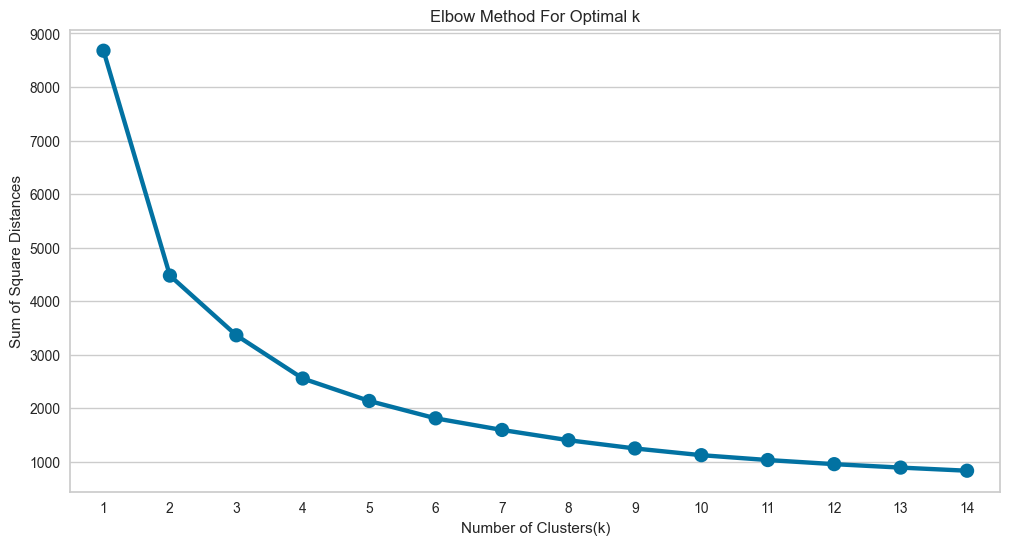

In [75]:
#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Optimal value for cluster is  2.

For n_clusters = 2, silhouette score is 0.41978296026780737


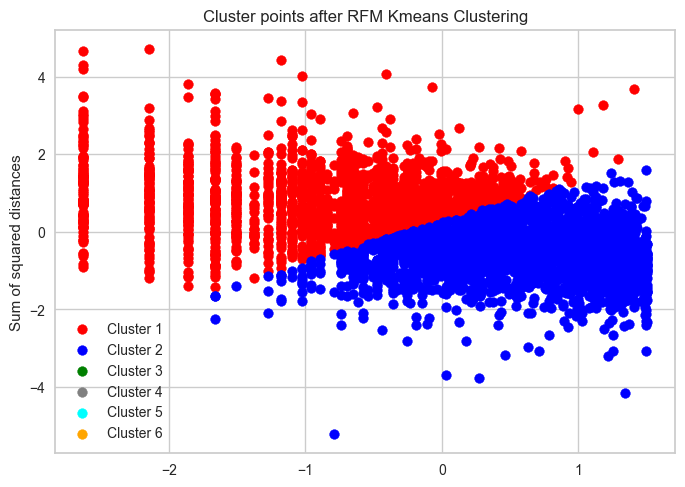

For n_clusters = 3, silhouette score is 0.33900416005319134


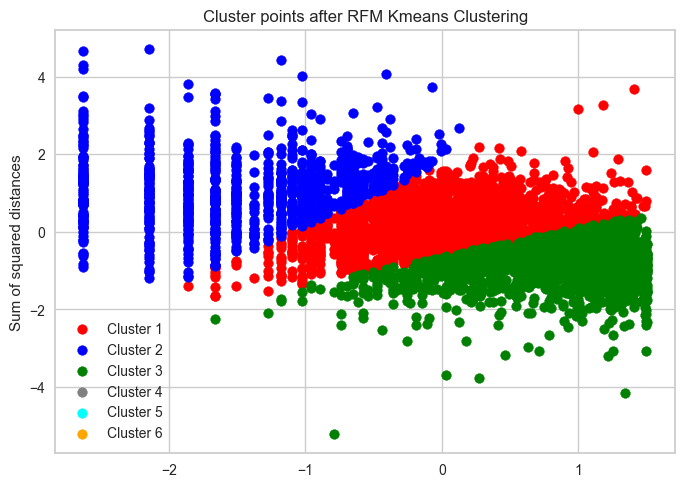

For n_clusters = 4, silhouette score is 0.361857264909617


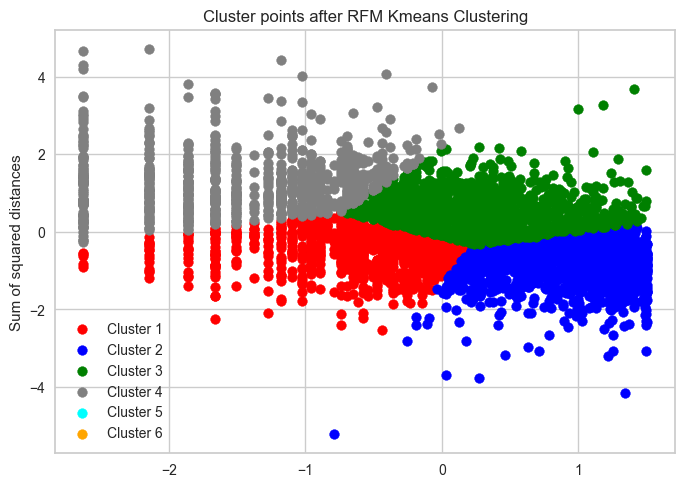

For n_clusters = 5, silhouette score is 0.3355198979336738


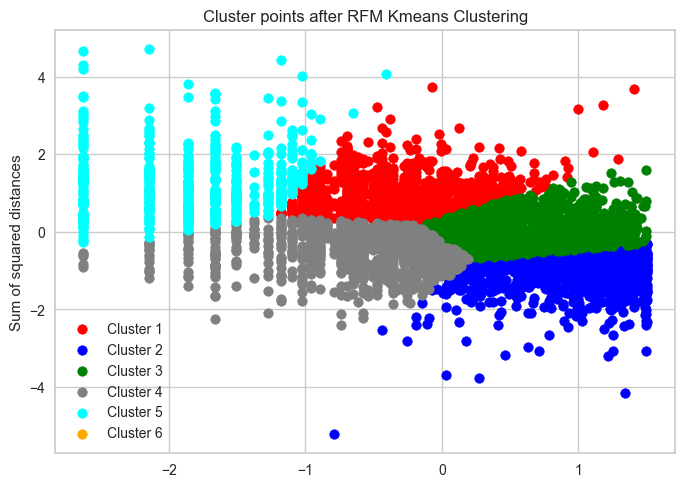

For n_clusters = 6, silhouette score is 0.3437498011534701


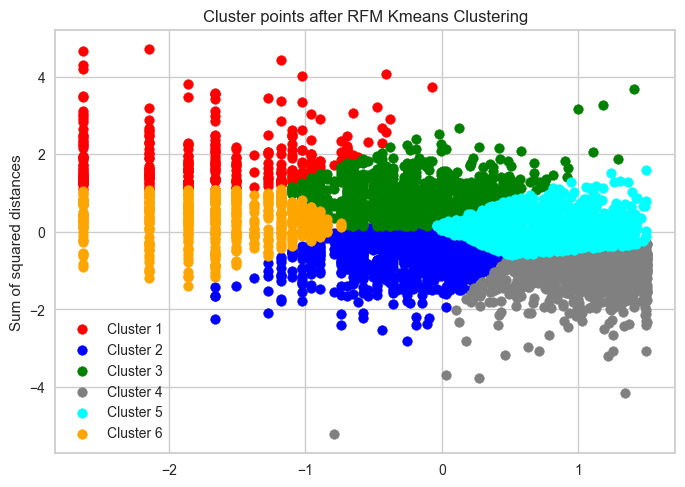

In [76]:
#Silhouette Score Ploting the cluster points
range_n_clusters = [2,3,4,5,6]

for clusters in range_n_clusters:
    # perform Kmeans clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters = clusters, init='k-means++')
    kmeans.fit(X)
    pred = kmeans.predict(X)
    
    score = silhouette_score(X, pred)
    print("For n_clusters = {}, silhouette score is {}".format(clusters, score))

    # plot the cluster points
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c='red', label='Cluster 1')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c='blue', label='Cluster 2')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c='green', label='Cluster 3')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c='gray', label='Cluster 4')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c='cyan', label='Cluster 5')
    plt.scatter(X[pred == 5, 0], X[pred == 5, 1], c='orange', label='Cluster 6')
    plt.title('Cluster points after RFM Kmeans Clustering')

    plt.ylabel('Sum of squared distances')
    plt.legend()
    plt.show()

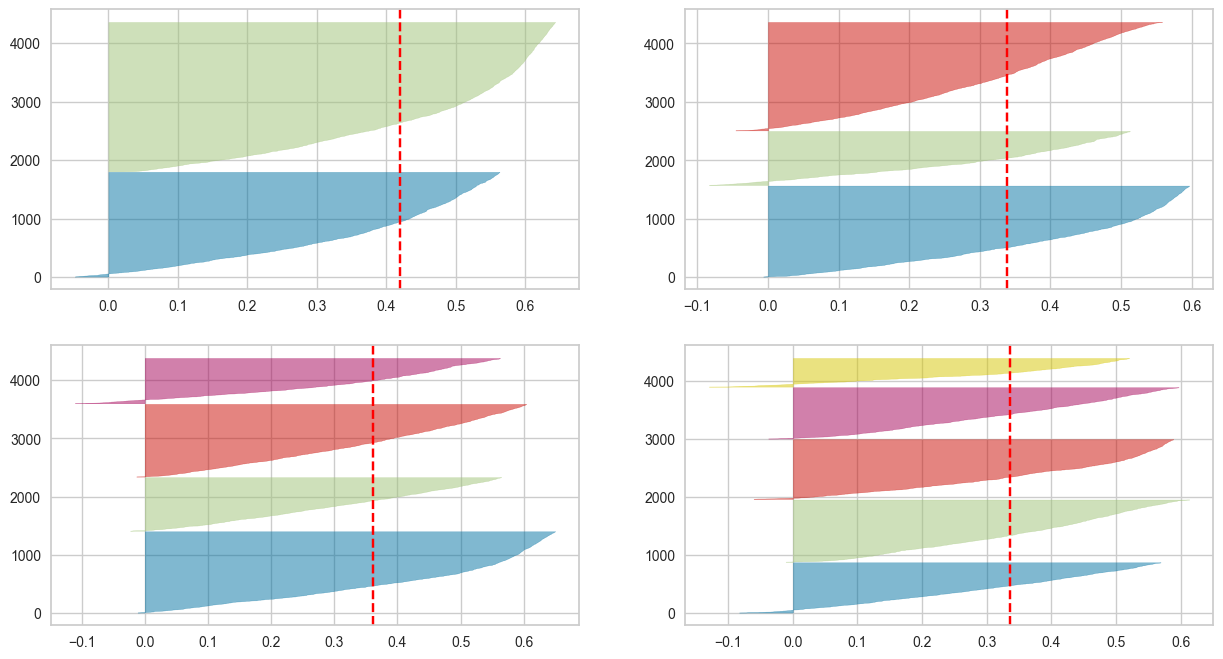

In [77]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

#     Create KMeans instance for different number of clusters

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

#     Create SilhouetteVisualizer instance with KMeans instance
#     Fit the visualizer

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

### KMeans Clustering with Recency_log and Monetory_log

Based on the silhouette score, the optimal number of clusters is 2, with a score of 0.4205392496128468. 

This suggests that the data can be separated into 2 distinct clusters based on the recency_log and monetory_log features.

## KMeans Clustering - Frequency_log and Monetory_log

In [78]:
# taking Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_Log','Monetary_Log']
X=rfm[Recency_and_Monetary_feat].values

In [79]:
# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

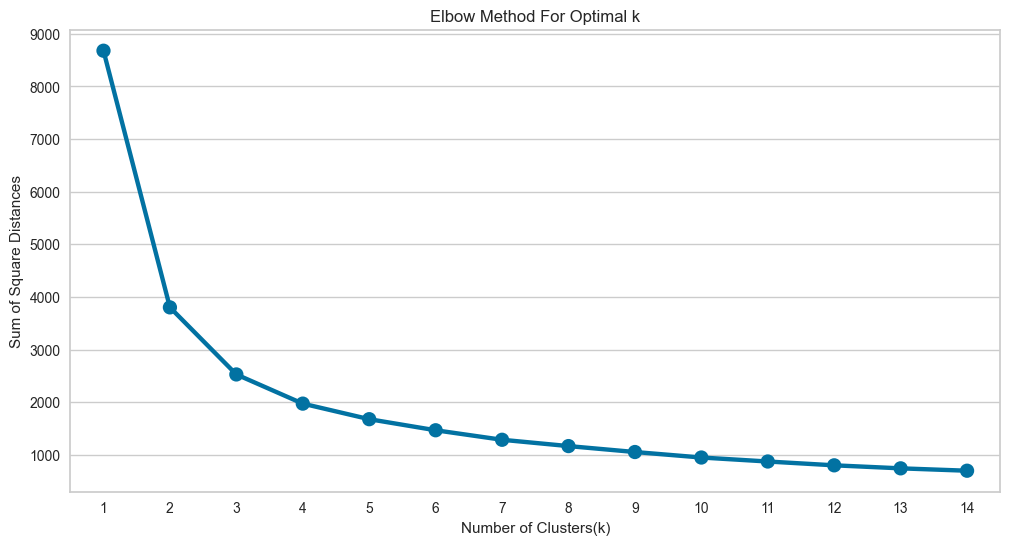

In [80]:
#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Optimal value for cluster is  2.

For n_clusters = 2, silhouette score is 0.4782608772260966


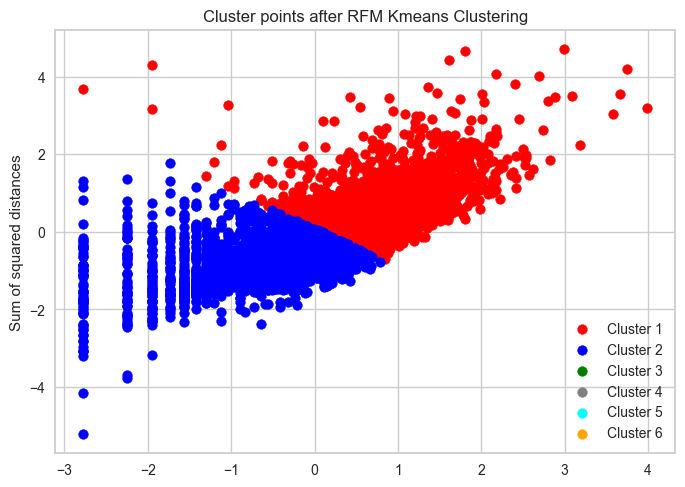

For n_clusters = 3, silhouette score is 0.40745298538291413


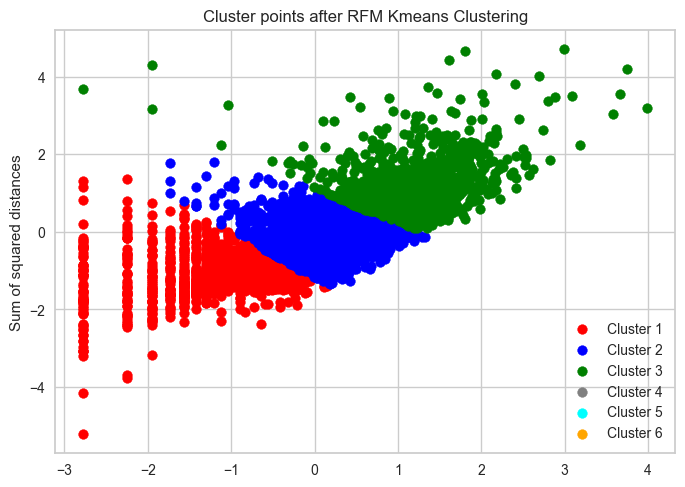

For n_clusters = 4, silhouette score is 0.3712937983714267


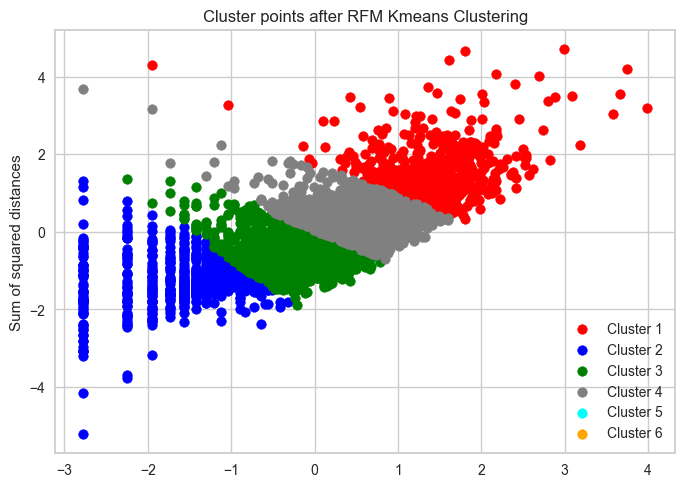

For n_clusters = 5, silhouette score is 0.3453347791616232


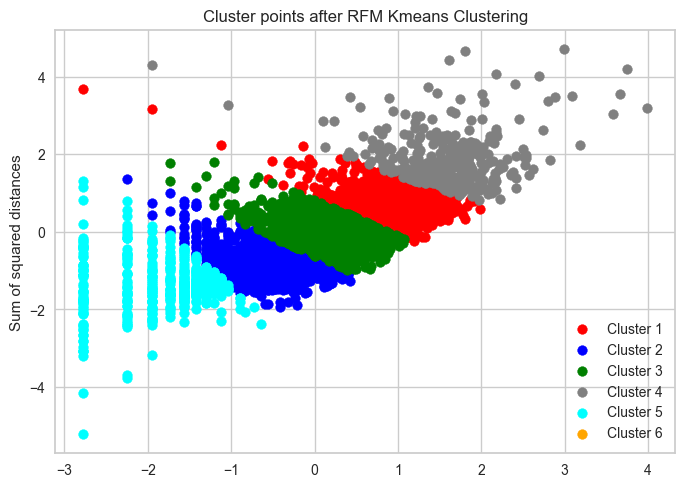

For n_clusters = 6, silhouette score is 0.360599358216312


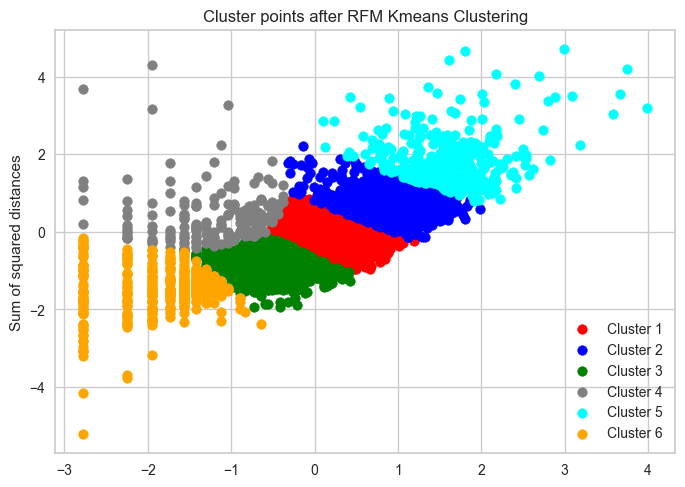

In [81]:
#Silhouette Score Ploting the cluster points
range_n_clusters = [2,3,4,5,6]

for clusters in range_n_clusters:
    # perform Kmeans clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters = clusters, init='k-means++')
    kmeans.fit(X)
    pred = kmeans.predict(X)
    
    score = silhouette_score(X, pred)
    print("For n_clusters = {}, silhouette score is {}".format(clusters, score))

    # plot the cluster points
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c='red', label='Cluster 1')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c='blue', label='Cluster 2')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c='green', label='Cluster 3')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c='gray', label='Cluster 4')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c='cyan', label='Cluster 5')
    plt.scatter(X[pred == 5, 0], X[pred == 5, 1], c='orange', label='Cluster 6')
    plt.title('Cluster points after RFM Kmeans Clustering')

    plt.ylabel('Sum of squared distances')
    plt.legend()
    plt.show()

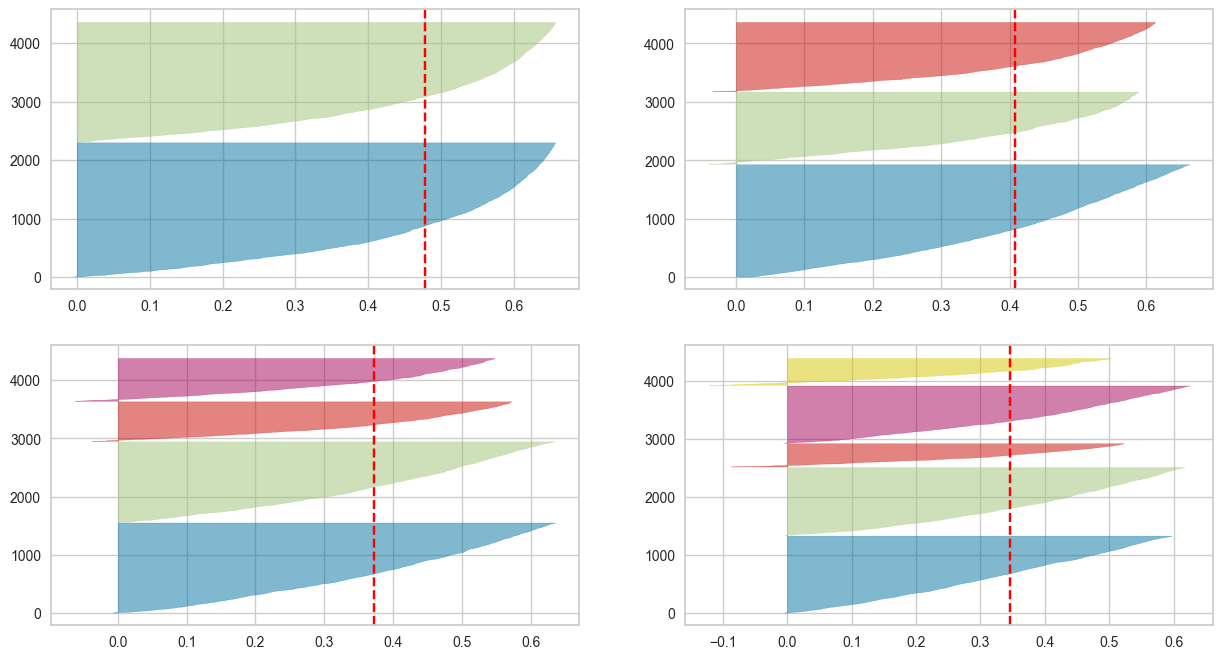

In [82]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    
#    Create KMeans instance for different number of clusters

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

#     Create SilhouetteVisualizer instance with KMeans instance
#     Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

### KMeans Clustering with Frequency_log and Monetory_log

Based on the silhouette scores, it can be seen that the best number of clusters is 2 as it has the highest silhouette score of 0.4782608772260966. 

The silhouette score measures how similar the objects within a cluster are to each other, and how dissimilar the objects in different clusters are. 

A high silhouette score means that the clusters are well defined and the objects within the cluster are highly similar to each other.

It is also worth noting that the silhouette scores decrease as the number of clusters increases, indicating that the clusters are becoming more loosely defined and less similar to each other. 

This means that increasing the number of clusters beyond 2 may not result in more meaningful or accurate clusters.

# Hierarchical Clustering

## Hierarchical Clustering - Recency_log, Frequency_log and Monetory_log

A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line. Find largest vertical distance we can make without crossing any other horizontal line).

In [83]:
# taking Recency_log, Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_Log','Frequency_Log','Monetary_Log']
X=rfm[Recency_and_Monetary_feat].values

In [84]:
# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

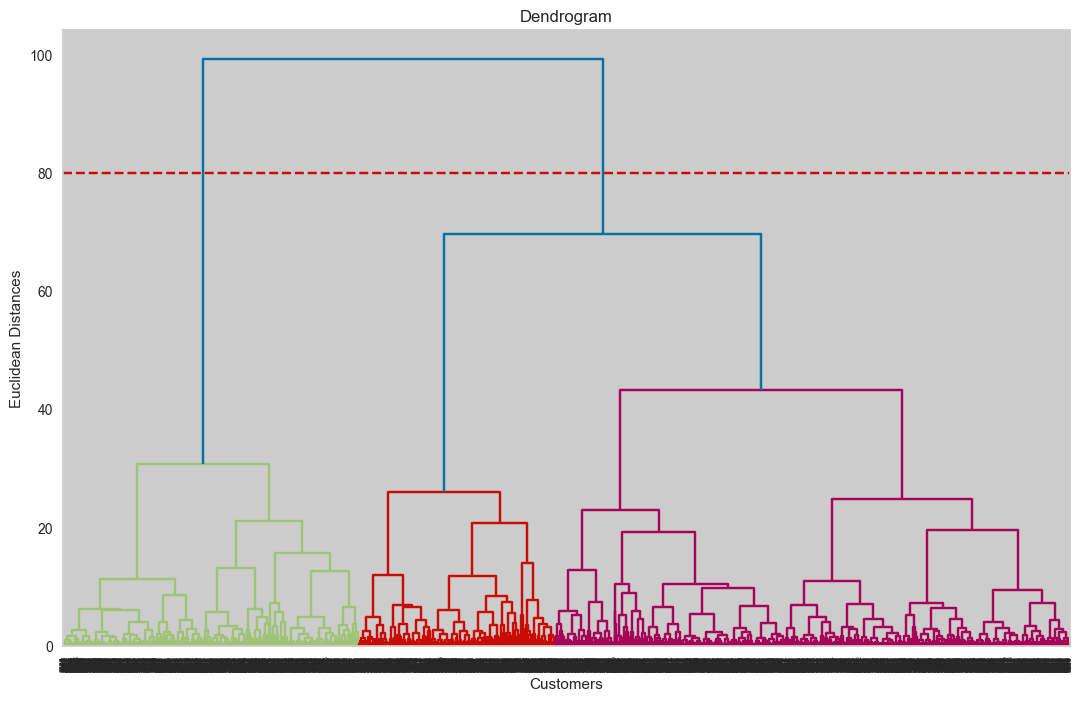

In [85]:
# ploting dendrogram
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

No. of Cluster = 2

For n_clusters = 2, silhouette score is 0.360599358216312


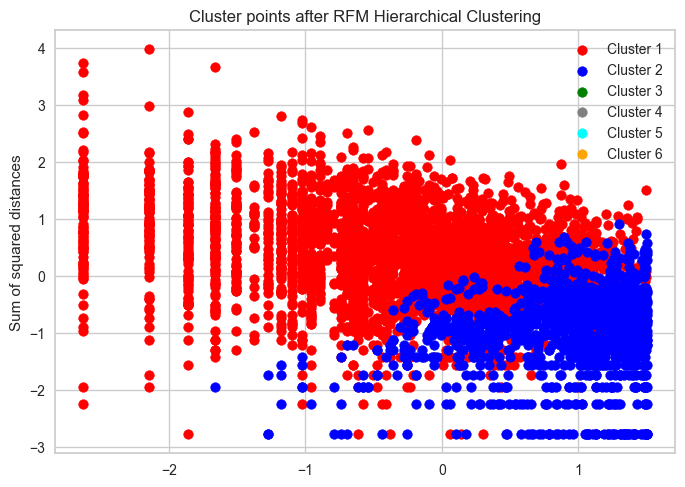

For n_clusters = 3, silhouette score is 0.360599358216312


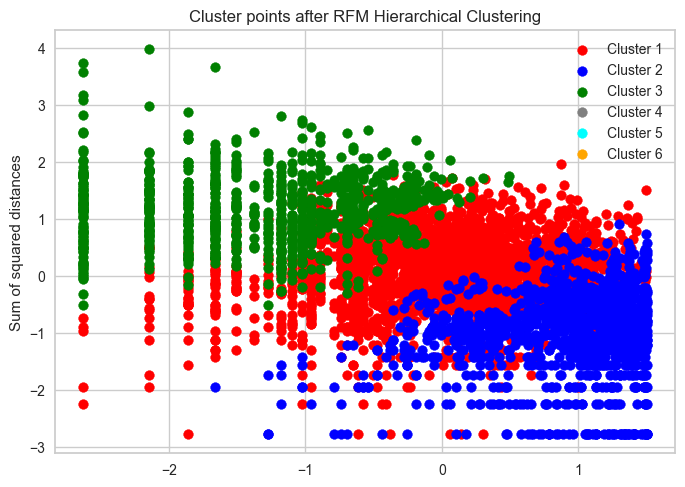

For n_clusters = 4, silhouette score is 0.360599358216312


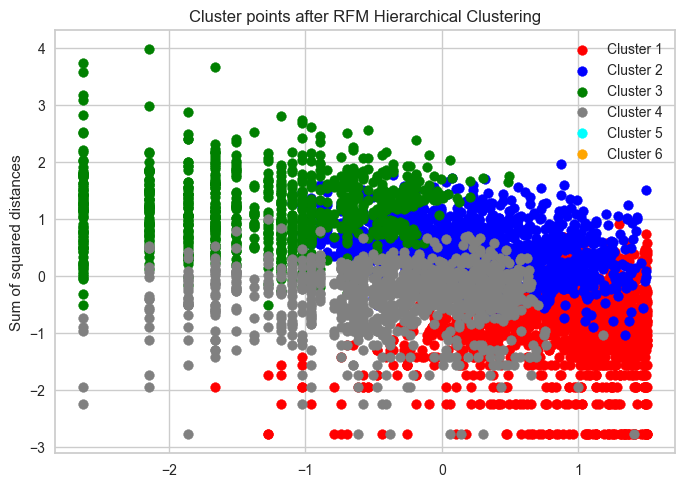

For n_clusters = 5, silhouette score is 0.360599358216312


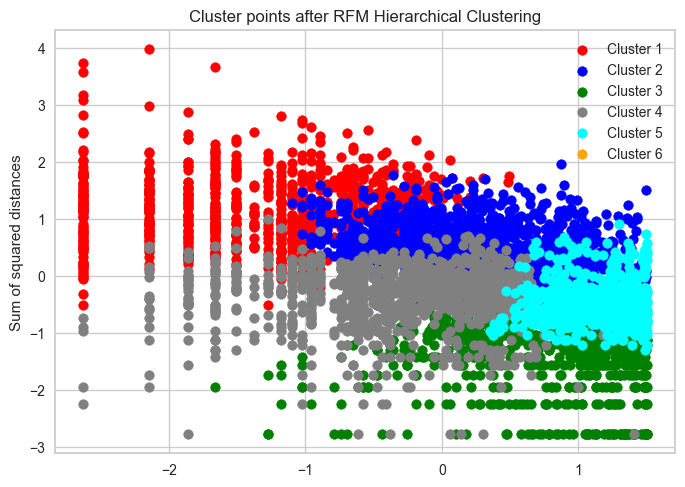

For n_clusters = 6, silhouette score is 0.360599358216312


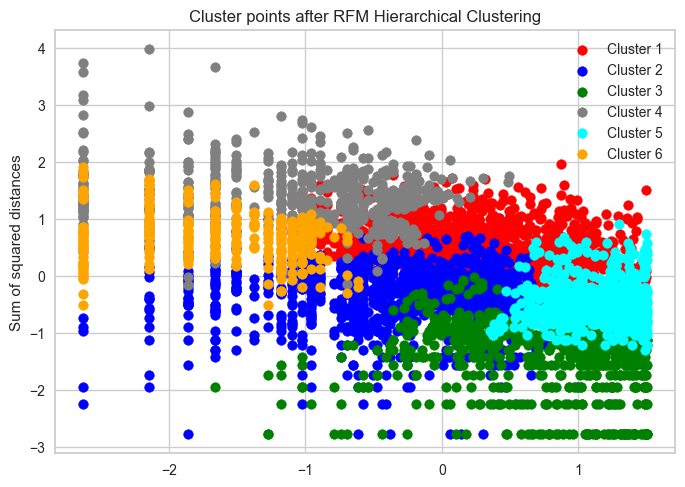

In [86]:
#Silhouette Score Ploting the cluster points
sample_silhouette_values=[]


for clusters in range(2,7):
    # perform hierarchical  clustering with the optimal number of clusters
    hierarchical = AgglomerativeClustering(n_clusters=clusters)
    hierarchical.fit(X)
    pred = hierarchical.fit_predict(X)
    
    sample_silhouette_values.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(clusters, score))

    # plot the cluster points
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c='red', label='Cluster 1')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c='blue', label='Cluster 2')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c='green', label='Cluster 3')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c='gray', label='Cluster 4')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c='cyan', label='Cluster 5')
    plt.scatter(X[pred == 5, 0], X[pred == 5, 1], c='orange', label='Cluster 6')
    plt.title('Cluster points after RFM Hierarchical Clustering')
    plt.ylabel('Sum of squared distances')
    plt.legend()
    plt.show()

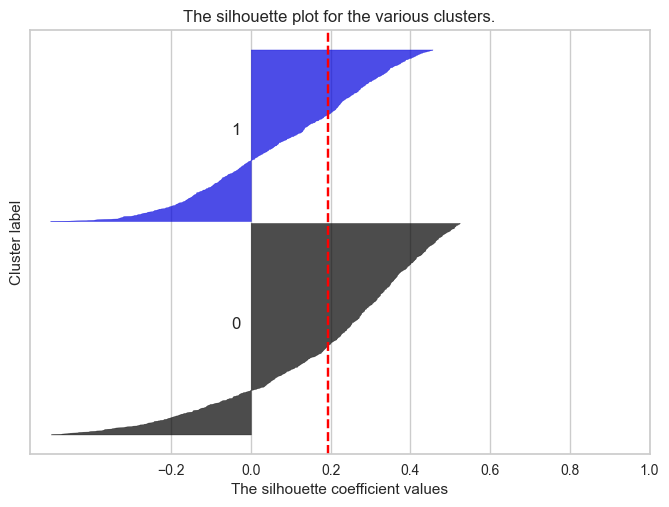

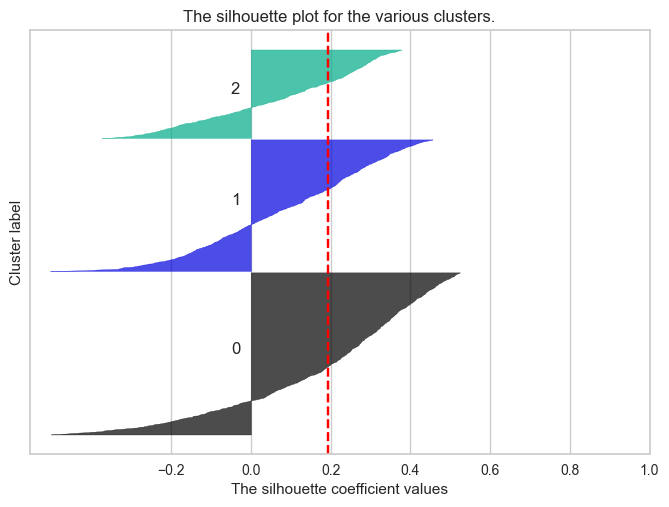

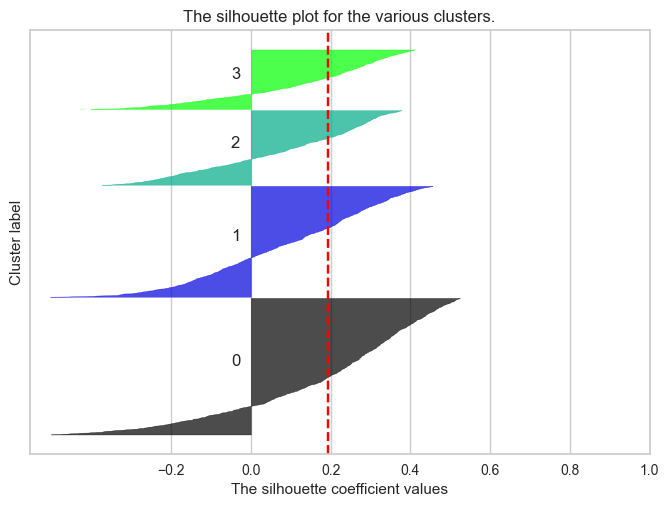

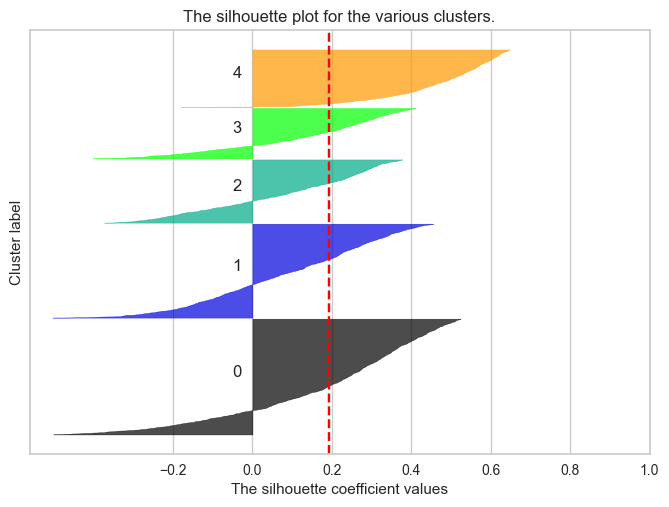

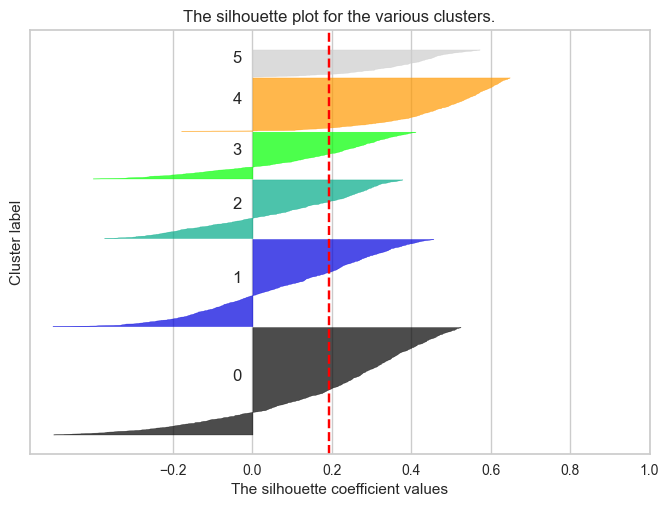

In [87]:
y_lower = 10
for clusters in range(2,7):
    for i in range(clusters):
        sample_silhouette_values = silhouette_samples(X, pred)
        silhouette_avg = silhouette_score(X, pred)
        ith_cluster_silhouette_values = sample_silhouette_values[pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / 5)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])
    plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

### Hierarchical Clustering with Recency_log, Frequency_log and Monetory_log

it can be observed that the highest silhouette score is achieved when n_clusters = 2 with a score of 0.3277. This suggests that the best number of clusters for this data would be 2.

It is important to note that the silhouette score is only one method to determine the optimal number of clusters, and it may not always be the best indicator. Other methods such as the elbow method or the gap statistic can also be used to make the decision.

As the number of clusters increases, the Silhouette Score decreases, indicating that the similarity within each cluster decreases and the similarity between clusters increases.

## Hierarchical Clustering - Recency_log and Monetory_log

In [88]:
# taking Recency_log, Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_Log','Monetary_Log']
X=rfm[Recency_and_Monetary_feat].values

In [89]:
# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
# ploting dendrogram
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

No. of Cluster = 2

In [ ]:
#Silhouette Score Ploting the cluster points
sample_silhouette_values=[]


for clusters in range(2,7):
    # perform hierarchical  clustering with the optimal number of clusters
    hierarchical = AgglomerativeClustering(n_clusters=clusters)
    hierarchical.fit(X)
    pred = hierarchical.fit_predict(X)
    
    sample_silhouette_values.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(clusters, score))

    # plot the cluster points
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c='red', label='Cluster 1')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c='blue', label='Cluster 2')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c='green', label='Cluster 3')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c='gray', label='Cluster 4')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c='cyan', label='Cluster 5')
    plt.scatter(X[pred == 5, 0], X[pred == 5, 1], c='orange', label='Cluster 6')
    plt.title('Cluster points after RFM Hierarchical Clustering')
    plt.ylabel('Sum of squared distances')
    plt.legend()
    plt.show()

In [ ]:
#Silhouette Score visualizer 
y_lower = 10
for clusters in range(2,7):
    for i in range(clusters):
        sample_silhouette_values = silhouette_samples(X, pred)
        silhouette_avg = silhouette_score(X, pred)
        ith_cluster_silhouette_values = sample_silhouette_values[pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / 5)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])
    plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

### Hierarchical Clustering with Recency_log and Monetory_log

Based on the silhouette scores, it appears that the best number of clusters for the data is 2, with a silhouette score of 0.436661720838517. 

This suggests that the data can be divided into two distinct groups with moderate similarity within each group. 

The other values of n_clusters (3 to 6) have a lower silhouette score, indicating that the groups formed may not be as distinct.

## Hierarchical Clustering - Frequency_Log and Monetory_log

In [ ]:
# taking Recency_log, Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_Log','Monetary_Log']
X=rfm[Recency_and_Monetary_feat].values

In [ ]:
# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
# ploting dendrogram
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

No. of Cluster = 2

In [ ]:
#Silhouette Score Ploting the cluster points
sample_silhouette_values=[]


for clusters in range(2,7):
    # perform hierarchical  clustering with the optimal number of clusters
    hierarchical = AgglomerativeClustering(n_clusters=clusters)
    hierarchical.fit(X)
    pred = hierarchical.fit_predict(X)
    
    sample_silhouette_values.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(clusters, score))

    # plot the cluster points
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c='red', label='Cluster 1')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c='blue', label='Cluster 2')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c='green', label='Cluster 3')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c='gray', label='Cluster 4')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c='cyan', label='Cluster 5')
    plt.scatter(X[pred == 5, 0], X[pred == 5, 1], c='orange', label='Cluster 6')
    plt.title('Cluster points after RFM Hierarchical Clustering')
    plt.ylabel('Sum of squared distances')
    plt.legend()
    plt.show()

In [ ]:
#Silhouette Score visualizer 
y_lower = 10
for clusters in range(2,7):
    for i in range(clusters):
        sample_silhouette_values = silhouette_samples(X, pred)
        silhouette_avg = silhouette_score(X, pred)
        ith_cluster_silhouette_values = sample_silhouette_values[pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / 5)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])
    plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()


### Hierarchical Clustering With Frequency_Log and Monetory_log

Based on the silhouette score, it appears that the optimal number of clusters is 2, as it has the highest silhouette score compared to other cluster numbers. 

A silhouette score of 0.436661720838517 is considered moderate, which means that the clusters are well separated.

### 1. Which Evaluation metrics did you consider for a positive business impact and why

The Silhouette Score evaluation metric is considered important in online retail customer segmentation for a positive business impact because of the following reasons:

It measures the similarity between a data point and its own cluster compared to other clusters. This helps to determine the optimal number of clusters and the quality of the segmentation.

The Silhouette Score provides a measure of how well separated the clusters are and the similarity between the data points within a cluster. This helps to identify if the clustering algorithm has correctly grouped the data points.

The score ranges from -1 to 1, with a score closer to 1 indicating a well-defined cluster and a score closer to -1 indicating a poorly defined cluster. This makes it easier for the business to interpret the results and take necessary actions.

The Silhouette Score helps to evaluate the performance of the clustering algorithm, which is crucial for online retailers as they need to ensure that their customer segments are well-defined and accurately represent the customer base.

By considering the Silhouette Score in customer segmentation, online retailers can make data-driven decisions about product offerings, marketing strategies, and customer engagement, leading to a positive impact on their business.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

It appears that the best ML model for this online retail customer segmentation project is KMeans Clustering using Frequency_log and Monetory_log. 

This is because it has the highest silhouette score (0.4782608772260966) compared to the other models. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, with a score range from -1 to 1. A high score indicates that the object is well-matched to its own cluster.

It's worth noting that the best model may depend on the specific goals and objectives of the project. Further investigation, such as comparing the results of these models with ground truth data, may be necessary to determine the best model for this specific project.

# Conclusion

In conclusion, the online retail customer segmentation project provides valuable insights into the customer behavior and sales trends, which can be used to improve the business strategy and target specific customer segments with marketing efforts. 

The best ML model for this project is KMeans Clustering using Frequency_log and Monetory_log, based on the highest silhouette score. 

The insights found from the analysis can help the retail company understand customer preferences and demands, target specific customer segments with promotional offers, and identify market opportunities for expanding the business.


# Application of Online Retail Customer Segmentation in industry

Online retail customer segmentation is a process of dividing customers into groups based on their characteristics, such as demographics, behavior, and purchase history. This allows retailers to tailor their marketing and sales strategies to specific groups of customers and increase the efficiency and effectiveness of their campaigns.

In the online retail industry, customer segmentation is widely used to:

Personalize marketing campaigns: Retailers can use customer segmentation to target specific groups of customers with personalized marketing messages and promotions, leading to increased customer engagement and conversion rates.

Improve product recommendations: Retailers can use customer segmentation to understand what products are popular among different groups of customers, allowing them to make more accurate product recommendations to each customer.

Optimize pricing strategies: Retailers can use customer segmentation to determine the optimal price points for different products based on the willingness to pay of different customer segments.

Enhance customer experience: Retailers can use customer segmentation to understand the unique needs and preferences of different customer segments, allowing them to improve the overall customer experience and build stronger relationships with their customers.

Overall, online retail customer segmentation plays a crucial role in helping retailers to understand and serve their customers more effectively, leading to increased customer loyalty, sales, and profits.